## Notebook Made by : == Kamal Chouhbi ==

-
-
-

                         
The problem is to predict Airbnb prices (houses) based on their characteristics. This is a regression problem because we try to predict a continuous value instead of a binary value.

Airbnb is one of the biggest online accomodation renting platform. Millions are using it each day in order to rent homes/rooms from actual hosts. We will be working with London Airbnb data which includes all the up-to-date listings available on airbnb (until december 2019), and also all the reviews that those listing received.

<img src='https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fcom.ft.imagepublish.upp-prod-us.s3.amazonaws.com%2Febf5ec22-fa20-11e8-a154-2b65ddf314e9?fit=scale-down&source=next&width=700' width="600">



# Contents
1. [Importing Packages](#p1)
2. [Loading and Inspecting Data](#p2)
3. [Data Cleaning](#p3)
4. [Preprocessing Data](#p4)
5. [Data Visualization](#p5)
6. [Feature Engineering](#p6)
7. [Inspecting Data: Target Variable](#p7)
8. [Process : ML Models](#p8)
9. [Model Comparison](#p9)
10. [Conclusion](#p10)

<a id="p1"></a>
# 1.  Importing Packages
We will need as usual the numpy and pandas libraries to work with numbers and data, seaborn and matplotlib to visualize data. We would also like to filter out unnecessary warnings.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

import collections
import itertools

import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Using TensorFlow backend.


<a id="p2"></a>
# 2. Loading and Inspecting Data
We will try to load our Training and Test data set with some Pandas functions as well as inspect it in order to get an idea of the data we're working with. It is necessary to understand the data features before to start running any model.

In [2]:
#Data_train
df_train = pd.read_csv('train.csv')
#Data_test
df_test = pd.read_csv('test.csv')

df_train.head()

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (12,19,44,51,52,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.



id                                               name  \
0  22314130.0           Private Room in a 2 bedrooms garden flat   
1  21927482.0                         Westbourne Grove 3 Bed Gem   
2  13923607.0          Spacious 3 bed garden flat off Brick Lane   
3  21859233.0          Bright One Bedroom next to Battersea Park   
4  29932936.0  Luxurious 2 bed river apartment with free parking   

                                             summary  \
0  This 2 bedrooms garden flat has 1 double room ...   
1  Light, stylish & modern 3 bedroom Notting Hill...   
2  Spacious ground floor apartment with three wel...   
3  Bright one bedroom flat near Battersea Park. I...   
4  We respond to enquiries and requests immediate...   

                                               space  \
0  The flat is cosy but really comfortable and ha...   
1  A contemporary apartment located a short dista...   
2  Location! Brick Lane is at the end of the stre...   
3  The flat is well decorated with all necessary ...   
4  River Thames Waterfront forms part of a distin...   

                                         description experiences_offered  \
0  This 2 bedrooms garden flat has 1 double room ...                none   
1  Light, stylish & modern 3 bedroom Notting Hill...                none   
2  Spacious ground floor apartment with three wel...                none   
3  Bright one bedroom flat near Battersea Park. I...                none   
4  We respond to enquiries and requests immediate...                none   

                               neighborhood_overview  \
0          The neighbourhood is very nice and quiet.   
1  One of the trendiest neighbourhoods in London ...   
2  Fun, vibrant, mixed neighbourhood, in a leafy ...   
3                                                NaN   
4  This property has the absolute wow factor givi...   

                                               notes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  MBNA Clipper boat service Royal Arsenal Pier, ...   

                                             transit  \
0  the flat is located 5 minutes walk from Tootin...   
1  Near Bayswater Tube, Queensway and Royal Oak (...   
2  Tube: Whitechapel (district line) closest, 7 m...   
3                                                NaN   
4  0.4 miles to Woolwich Arsenal National rail St...   

                                              access  ... instant_bookable  \
0  You can access all shared spaces, kitchen, lou...  ...                f   
1              Entire apartment available to guests.  ...                f   
2  Kitchen: American fridge freezer, gas oven, ne...  ...                f   
3  Guests will have access to the entire property...  ...                f   
4             Guests can access the entire apartment  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            2.0                                         1.0   
1                            1.0                                   

In [3]:
df_train[['reviews_per_month','price']].head(5)

reviews_per_month  price
0                NaN   39.0
1               0.79  230.0
2               1.30  131.0
3                NaN   80.0
4               1.96  120.0

In [4]:
df_train.shape, df_test.shape

((50196, 89), (11774, 88))

One of the most elementary steps to do this is by getting a basic description of the data. A basic description of the dataset is indeed a very broad term: you can interpret it as a quick and dirty way to get some information on your data, as a way of getting some simple, easy-to-understand information on your data, to get a basic feel for your data. 

Please note that we can use the describe() function to get various summary statistics, which exclude **NaN** values.

In [5]:
df_train.describe()

id  host_listings_count  host_total_listings_count  \
count  5.019300e+04         50192.000000               50192.000000   
mean   1.858093e+07            28.183188                  28.180100   
std    8.824201e+06           154.814257                 154.814307   
min    9.418000e+03             0.000000                  -0.208190   
25%    1.201559e+07             1.000000                   1.000000   
50%    1.997468e+07             2.000000                   2.000000   
75%    2.615525e+07             4.000000                   4.000000   
max    3.152904e+07          1483.000000                1483.000000   

       neighbourhood_group_cleansed      latitude     longitude  accommodates  \
count                           3.0  50193.000000  50193.000000  50193.000000   
mean                            1.0     51.506844     -0.127791      3.202279   
std                             0.0      0.388078      0.092983      7.353455   
min                             1.0      1.000000     -0.496958      0.000000   
25%                             1.0     51.485360     -0.187887      2.000000   
50%                             1.0     51.513891     -0.124983      2.000000   
75%                             1.0     51.537679     -0.070113      4.000000   
max                             1.0     51.681694      2.000000   1125.000000   

           bedrooms          beds   square_feet  ...  review_scores_checkin  \
count  50165.000000  50101.000000    284.000000  ...           36936.000000   
mean       1.405422      1.734816    633.598592  ...               9.637758   
std        0.924838      1.272359    865.111591  ...               0.871353   
min        0.000000      0.000000      0.000000  ...               0.210000   
25%        1.000000      1.000000    129.000000  ...              10.000000   
50%        1.000000      1.000000    527.500000  ...              10.000000   
75%        2.000000      2.000000    852.750000  ...              10.000000   
max       44.000000     59.000000  10710.000000  ...              10.000000   

       review_scores_communication  review_scores_location  \
count                 36971.000000            36933.000000   
mean                      9.676097                9.478001   
std                       0.844500                0.834602   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  jurisdiction_names  \
count         36928.000000                 0.0   
mean              9.279896                 NaN   
std               1.002326                 NaN   
min               2.000000                 NaN   
25%               9.000000                 NaN   
50%               9.000000                 NaN   
75%              10.000000                 NaN   
max              10.000000                 NaN   

       calculated_host_listings_count  \
count                    50190.000000   
mean                        22.867723   
std                        123.850165   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          4.000000   
max                       1064.000000   

       calculated_host_listings_count_entire_homes  \
count                                 50190.000000   
mean                                     21.042897   
std                                     123.578841   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                    1061.000000   

       calculated_host_listings_count_private_rooms  \
count        

<a id="p3"></a>
# 3. Data Cleaning

### Dealing with missing values

There are many ways data can end up with missing values. For example:

* A 2 bedroom house wouldn't include an answer for how large is the third bedroom
* Someone being surveyed may choose not to share their reviews or to publish a description about himself

**Python** libraries represent missing numbers as **Nan** which is short for "not a number". 

We can detect which cells have missing values in the training and the testing dataset, and then count how many there are in each column with the function:

In [6]:
def check_nan():
    missing_values_count = df_train.isnull().sum()
    missing_values_count = missing_values_count/df_train.shape[0]*100

    missing_values_count2 = df_test.isnull().sum()
    missing_values_count2 = missing_values_count2/df_test.shape[0]*100

    null = pd.concat([missing_values_count, missing_values_count2], axis=1, keys=["Training", "Testing"])
    return null.sort_values(by=["Training", "Testing"],ascending=False).head(15)

In [7]:
null = check_nan()
null

Training     Testing
jurisdiction_names            100.000000  100.000000
host_acceptance_rate           99.994023  100.000000
neighbourhood_group_cleansed   99.994023  100.000000
license                        99.812734   99.813148
square_feet                    99.434218   99.320537
notes                          60.731931   60.744012
interaction                    44.306319   43.978257
access                         42.465535   42.092747
host_about                     41.505299   41.430270
host_response_rate             41.232369   41.404790
host_response_time             41.232369   41.404790
house_rules                    41.106861   41.166978
neighborhood_overview          38.937366   38.236793
transit                        38.648498   38.321726
space                          31.892980   31.025989

Most libraries (including scikit-learn) will give you an error if you try to build a model using data with missing values. So we'll need to choose one of the strategies below:

#### A. Simple Option: Drop Columns with Missing Values

We can first drop the columns with **Nan** values. Unfortunately, if those columns had useful information (in the places that were not missing), our model will lose access to this information when the column is dropped. Also, if the test data has missing values in places where the training data did not, this will result in an error.

So, it's somewhat usually not the best solution. However, it can be useful when most values in a column are missing. So we will drop the columns where the percentage of **Nan** values is over **30%**.

In [8]:
features_eliminate = list(null[(null.Training>30) & (null.Testing>30)].index)
features_eliminate

['jurisdiction_names',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'license',
 'square_feet',
 'notes',
 'interaction',
 'access',
 'host_about',
 'host_response_rate',
 'host_response_time',
 'house_rules',
 'neighborhood_overview',
 'transit',
 'space']

In [9]:
for i in features_eliminate:
    df_train.drop([i], axis=1, inplace=True)
    df_test.drop([i], axis=1, inplace=True)
check_nan()

Training    Testing
review_scores_value          26.432385  26.167827
review_scores_location       26.422424  26.193307
review_scores_checkin        26.416448  26.184814
review_scores_communication  26.346721  26.074401
review_scores_accuracy       26.334768  26.091388
review_scores_cleanliness    26.318830  26.057415
review_scores_rating         26.267033  25.972482
host_neighbourhood           24.533827  25.191099
reviews_per_month            24.197147  23.789706
first_review                 24.191171  23.789706
last_review                  24.191171  23.789706
state                        23.031716  22.872431
neighbourhood                 5.454618   5.452692
summary                       4.105905   4.008833
zipcode                       2.498207   2.743333

#### B. Better Option: Imputation

Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely.

This is done with **SimpleImputer**, but before starting the imputation, we need to keep only the columns that we judge significant.

<a id="p4"></a>
# 4. Preprocessing Data

<a id="p41"></a>
## 4.1 Deciding which columns to work with

Based on my personal experience and by imagining myself as someone who'd like to offer their home, I concluded that:
- We have Fixed features of our property include its rooms, size, and location.
- We also can decide on how we want to be listed: with a picture or not, how many minimum nights we want a guest to stay, whether we are instantly bookable, how we handle cancellations, etc.
- Although we can have very important features for setting a price, but they're so relative. So, let's focus only on features we can influence.

Actually, after droping the columns above, we still have 73 columns (excluding **price**) which we can decice if we want to remove or not.

In [10]:
df_train.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'host_id', 'host_name', 'host_since', 'host_location',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number

In [11]:
#get significant features for according to me from this dataset and show 1 example
important_features = ['latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'amenities', 'price', 'guests_included',
                   'is_business_travel_ready', 'cancellation_policy','reviews_per_month',
                    'number_of_reviews','calculated_host_listings_count','availability_365','review_scores_rating',
                     'beds','host_total_listings_count','host_identity_verified',
                     'is_location_exact','host_is_superhost', 'neighbourhood_cleansed']
df_train = df_train[important_features]
df_train.head(1)

latitude  longitude     room_type  accommodates bathrooms  bedrooms  \
0  51.42426  -0.173471  Private room           2.0         1       1.0   

                                           amenities  price guests_included  \
0  {Wifi,Kitchen,"Smoking allowed","Pets allowed"...   39.0               1   

  is_business_travel_ready  ... number_of_reviews  \
0                        f  ...                 0   

   calculated_host_listings_count availability_365  review_scores_rating beds  \
0                             2.0                0                   NaN  1.0   

   host_total_listings_count  host_identity_verified  is_location_exact  \
0                        2.0                       t                  t   

  host_is_superhost neighbourhood_cleansed  
0                 f             Wandsworth  

[1 rows x 22 columns]

In [12]:
important_features.remove("price")
df_test = df_test[important_features]

In [13]:
df_test.head(1)

latitude  longitude        room_type  accommodates  bathrooms  bedrooms  \
0  51.540059  -0.118208  Entire home/apt             2        1.0       1.0   

                                           amenities  guests_included  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...                2   

  is_business_travel_ready          cancellation_policy  ...  \
0                        f  strict_14_with_grace_period  ...   

   number_of_reviews  calculated_host_listings_count  availability_365  \
0                 14                               6               275   

   review_scores_rating  beds  host_total_listings_count  \
0                  80.0   1.0                        6.0   

   host_identity_verified is_location_exact host_is_superhost  \
0                       f                 t                 f   

  neighbourhood_cleansed  
0              Islington  

[1 rows x 21 columns]

In [14]:
check_nan()

Training    Testing
review_scores_rating            26.267033  25.972482
reviews_per_month               24.197147  23.789706
bathrooms                        0.217149   0.237812
beds                             0.189258   0.220826
bedrooms                         0.061758   0.050960
calculated_host_listings_count   0.011953   0.000000
cancellation_policy              0.011953   0.000000
is_business_travel_ready         0.011953   0.000000
host_identity_verified           0.007969   0.008493
host_is_superhost                0.007969   0.008493
host_total_listings_count        0.007969   0.008493
accommodates                     0.005977   0.000000
amenities                        0.005977   0.000000
availability_365                 0.005977   0.000000
guests_included                  0.005977   0.000000

There are a lot of **nan** values in **reviews_per_month**. There is not a huge difference between it and the **number_of_reviews**. So we will delete **reviews_per_month**.

In [15]:
df_train.drop(['reviews_per_month'], axis=1, inplace=True)
df_test.drop(['reviews_per_month'], axis=1, inplace=True)

In [16]:
check_nan()

Training    Testing
review_scores_rating            26.267033  25.972482
bathrooms                        0.217149   0.237812
beds                             0.189258   0.220826
bedrooms                         0.061758   0.050960
calculated_host_listings_count   0.011953   0.000000
cancellation_policy              0.011953   0.000000
is_business_travel_ready         0.011953   0.000000
host_identity_verified           0.007969   0.008493
host_is_superhost                0.007969   0.008493
host_total_listings_count        0.007969   0.008493
accommodates                     0.005977   0.000000
amenities                        0.005977   0.000000
availability_365                 0.005977   0.000000
guests_included                  0.005977   0.000000
is_location_exact                0.005977   0.000000

So we still have features with **Nan values**, we need to handle them. I will fill it with the majority values of feature. Before doing that, I need to check the types of the columns because pandas had read some numeric data as object.

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50196 entries, 0 to 50195
Data columns (total 21 columns):
latitude                          50193 non-null float64
longitude                         50193 non-null float64
room_type                         50193 non-null object
accommodates                      50193 non-null float64
bathrooms                         50087 non-null object
bedrooms                          50165 non-null float64
amenities                         50193 non-null object
price                             50193 non-null float64
guests_included                   50193 non-null object
is_business_travel_ready          50190 non-null object
cancellation_policy               50190 non-null object
number_of_reviews                 50193 non-null object
calculated_host_listings_count    50190 non-null float64
availability_365                  50193 non-null object
review_scores_rating              37011 non-null float64
beds                              50101 non-

In [18]:
for i in df_train.columns:
    print('------------------------------')
    print(i)
    print('------------------------------')
    print(df_train[i].value_counts())

------------------------------
latitude
------------------------------
2.000000     2
51.479909    1
51.489783    1
51.418330    1
51.485572    1
51.520979    1
51.448776    1
51.508694    1
51.471609    1
51.495259    1
51.556690    1
51.557432    1
51.490450    1
51.490180    1
51.463041    1
51.413786    1
51.490823    1
51.369273    1
51.492944    1
51.592342    1
51.380501    1
51.537770    1
51.555831    1
51.523701    1
51.596112    1
51.654217    1
51.524476    1
51.441942    1
51.475996    1
51.508231    1
            ..
51.512956    1
51.548294    1
51.517374    1
51.519425    1
51.553044    1
51.533376    1
51.473286    1
51.574601    1
51.514734    1
51.488871    1
51.518042    1
51.551502    1
51.513016    1
51.511402    1
51.561482    1
51.498091    1
51.486648    1
51.537443    1
51.501423    1
51.513539    1
51.426763    1
51.425757    1
51.495413    1
51.474713    1
51.550120    1
51.541760    1
51.455880    1
51.465441    1
51.432977    1
51.463574    1
Name: latitude

Name: amenities, Length: 45834, dtype: int64
------------------------------
price
------------------------------
50.0       1865
100.0      1803
40.0       1752
35.0       1526
30.0       1506
60.0       1396
120.0      1384
45.0       1381
80.0       1347
150.0      1344
90.0       1193
70.0       1156
75.0       1095
55.0       1073
25.0       1016
65.0        909
85.0        876
110.0       805
200.0       762
95.0        685
99.0        665
130.0       638
140.0       582
125.0       526
20.0        525
250.0       512
160.0       464
39.0        427
180.0       425
49.0        413
           ... 
463.0         1
919.0         1
930.0         1
749.0         1
931.0         1
2190.0        1
442.0         1
870.0         1
1983.0        1
818.0         1
629.0         1
615.0         1
1600.0        1
1977.0        1
862.0         1
1112.0        1
733.0         1
740.0         1
952.0         1
659.0         1
418.0         1
901.0         1
447.0         1
2119.0        1
10000.0

In [19]:
df_train = df_train[(df_train.is_location_exact != 1125) & (df_train.is_location_exact != 15) ]
df_train = df_train[df_train.host_is_superhost != 'GB']
df_train = df_train[(df_train.host_identity_verified != 'Private room') & (df_train.host_identity_verified != 'Entire home/apt') ]
df_train = df_train[df_train.availability_365 != 'f']

### Be Careful and don't run the code above twice, or you'll ruin the dataset !!!!!

In [20]:
df_train.shape

(50193, 21)

In [21]:
df_train.is_business_travel_ready.value_counts(), df_test.is_business_travel_ready.value_counts()

(f    50190
 Name: is_business_travel_ready, dtype: int64, f    11774
 Name: is_business_travel_ready, dtype: int64)

So we can see that the column **is_business_travel_ready** only contains **f** in both training and testing dataset, so there is no need to keep it.

In [22]:
df_train.drop(['is_business_travel_ready'], axis=1, inplace=True)
df_test.drop(['is_business_travel_ready'], axis=1, inplace=True)

In [23]:
df_train.shape, df_test.shape

((50193, 20), (11774, 19))

In [24]:
df_train['bathrooms']= pd.to_numeric(df_train['bathrooms'])
df_train['guests_included']= pd.to_numeric(df_train['guests_included'])
df_train['number_of_reviews']= pd.to_numeric(df_train['number_of_reviews'])
df_train['availability_365']= pd.to_numeric(df_train['availability_365'])

In [25]:
df_train.dtypes

latitude                          float64
longitude                         float64
room_type                          object
accommodates                      float64
bathrooms                         float64
bedrooms                          float64
amenities                          object
price                             float64
guests_included                   float64
cancellation_policy                object
number_of_reviews                 float64
calculated_host_listings_count    float64
availability_365                  float64
review_scores_rating              float64
beds                              float64
host_total_listings_count         float64
host_identity_verified             object
is_location_exact                  object
host_is_superhost                  object
neighbourhood_cleansed             object
dtype: object

<a id="p5"></a>
# 5. Data Visualization

### Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

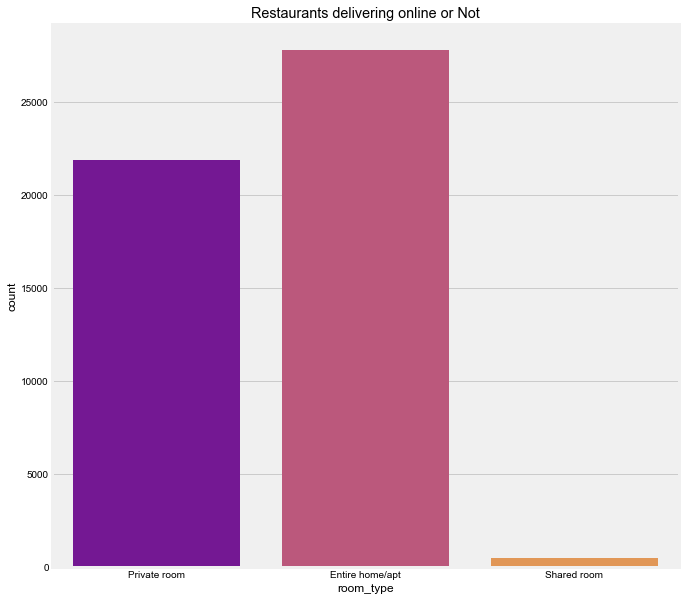

In [31]:
sns.countplot(df_train['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

### Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

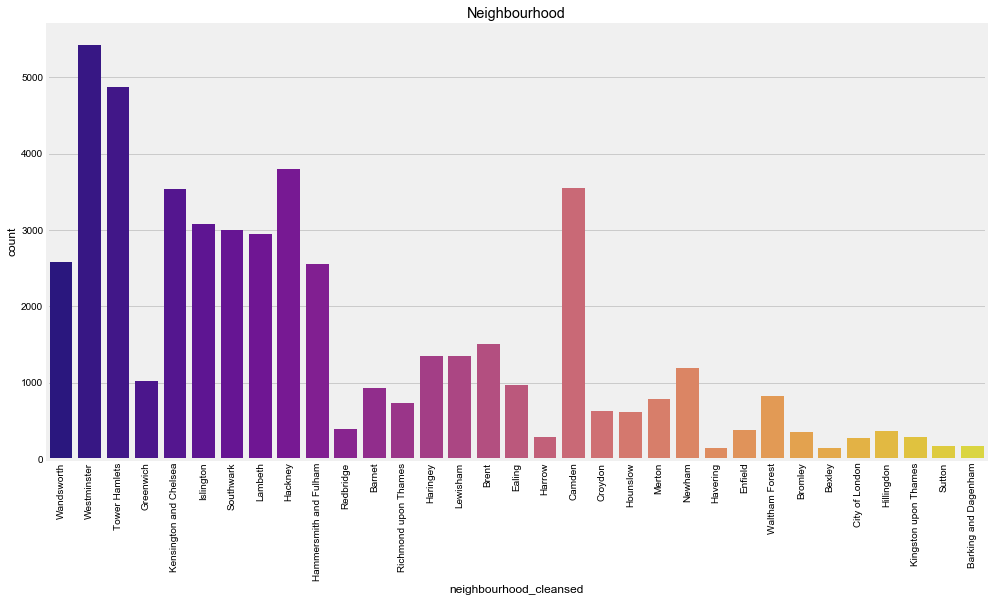

In [44]:
chart = sns.countplot(df_train['neighbourhood_cleansed'], palette="plasma")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.title('Neighbourhood')

### Map of Neighbourhood

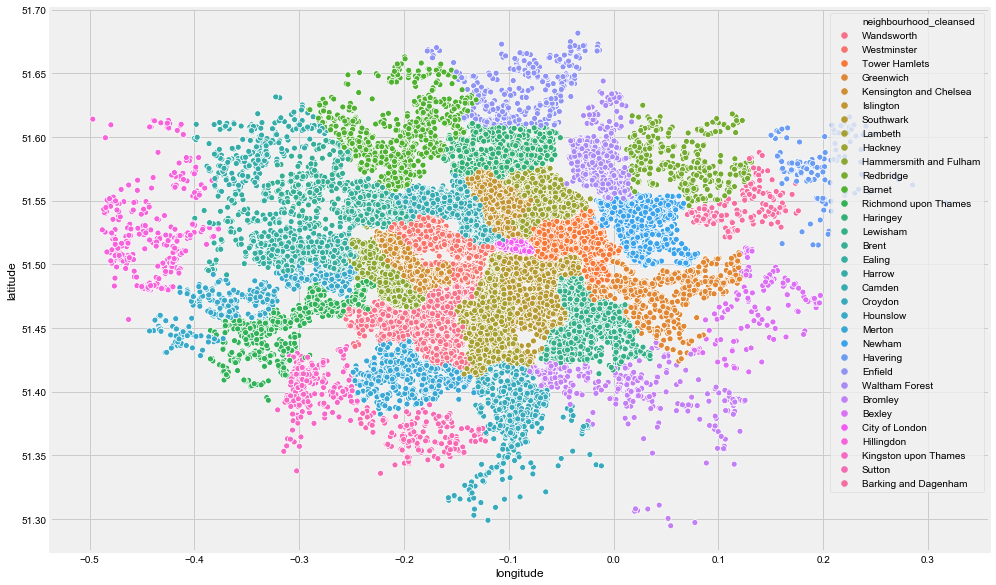

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(df_train.longitude,df_train.latitude,hue=df_train.neighbourhood_cleansed)
plt.ioff()

### Availability of Room

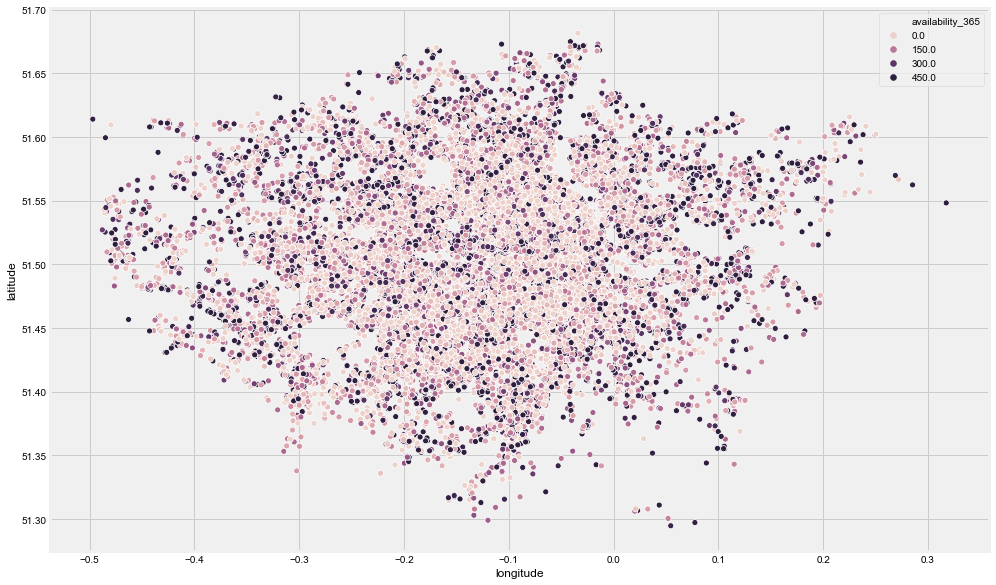

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(df_train.longitude,df_train.latitude,hue=df_train.availability_365)
plt.ioff()

### Cancellation_policy

Text(0.5, 1.0, 'Cancellation_policy')

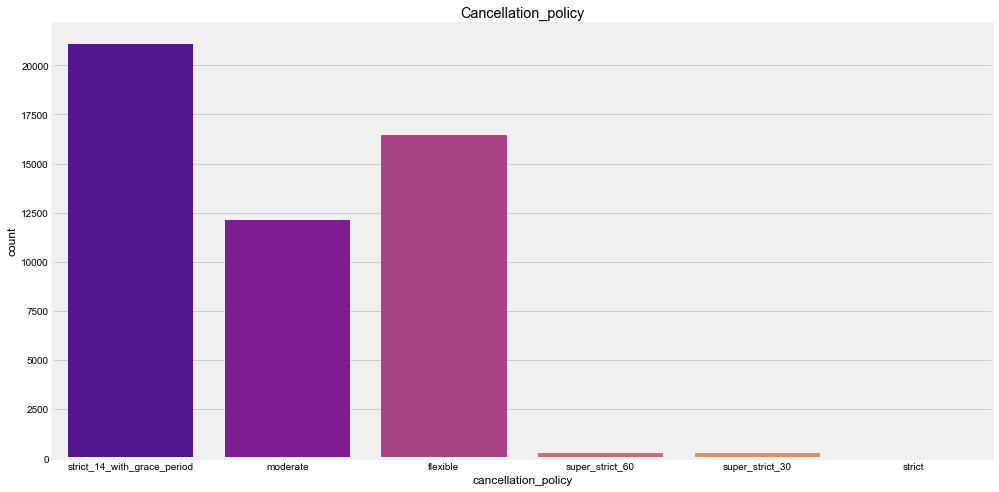

In [46]:
sns.countplot(df_train['cancellation_policy'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.title('Cancellation_policy')

<a id="p6"></a>
# 6. Feature Engineering

We can create now new features from existing features. For example, we can create distance from latitude and longtitude to respond to the question: "How far is Home/Flat to London ?"

In [26]:
#create distance feature from latitude and longtitude 
from geopy.distance import great_circle

def distance_from_berlin(lat, lon):
    berlin_centre = (51.5074, 0.1277)
    record = (lat, lon)
    return great_circle(berlin_centre, record).km

In [47]:
#check Null values in Latitude and Longitude
df_train.latitude.isnull().sum(), df_train.longitude.isnull().sum()

(0, 0)

In [28]:
df_train=df_train.dropna(subset=['latitude','longitude'])

In [29]:
#add distanse dataset
df_train['distance'] = df_train.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)

df_train.head(1)

latitude  longitude     room_type  accommodates  bathrooms  bedrooms  \
0  51.42426  -0.173471  Private room           2.0        1.0       1.0   

                                           amenities  price  guests_included  \
0  {Wifi,Kitchen,"Smoking allowed","Pets allowed"...   39.0              1.0   

           cancellation_policy  ...  calculated_host_listings_count  \
0  strict_14_with_grace_period  ...                             2.0   

   availability_365  review_scores_rating  beds  host_total_listings_count  \
0               0.0                   NaN   1.0                        2.0   

   host_identity_verified is_location_exact host_is_superhost  \
0                       t                 t                 f   

  neighbourhood_cleansed   distance  
0             Wandsworth  22.819357  

[1 rows x 21 columns]

In [30]:
#add distanse dataset for test
df_test['distance'] = df_test.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)

df_test.head(1)

latitude  longitude        room_type  accommodates  bathrooms  bedrooms  \
0  51.540059  -0.118208  Entire home/apt             2        1.0       1.0   

                                           amenities  guests_included  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...                2   

           cancellation_policy  number_of_reviews  \
0  strict_14_with_grace_period                 14   

   calculated_host_listings_count  availability_365  review_scores_rating  \
0                               6               275                  80.0   

   beds  host_total_listings_count host_identity_verified is_location_exact  \
0   1.0                        6.0                      f                 t   

  host_is_superhost neighbourhood_cleansed  distance  
0                 f              Islington  17.39627

### Nominal Categorical :

In [48]:
#nominal_categorical : Room_type Train
print(df_train.room_type.unique())
x = df_train[["room_type"]]
x.room_type = pd.Categorical(x['room_type'])
del df_train['room_type']
dummies_room_type = pd.get_dummies(x, prefix = 'room_type')
df_train = pd.concat([df_train,dummies_room_type], axis=1)
df_train.head(3)

['Private room' 'Entire home/apt' 'Shared room']


C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.424260  -0.173471           2.0        1.0       1.0   
1  51.514852  -0.191821           6.0        1.5       3.0   
2  51.520874  -0.064827           5.0        1.0       3.0   

                                           amenities  price  guests_included  \
0  {Wifi,Kitchen,"Smoking allowed","Pets allowed"...   39.0              1.0   
1  {TV,"Cable TV",Wifi,Kitchen,Heating,"Family/ki...  230.0              1.0   
2  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  131.0              4.0   

           cancellation_policy  number_of_reviews  ...  beds  \
0  strict_14_with_grace_period                0.0  ...   1.0   
1  strict_14_with_grace_period                7.0  ...   3.0   
2  strict_14_with_grace_period               38.0  ...   4.0   

   host_total_listings_count  host_identity_verified  is_location_exact  \
0                        2.0                       t                  t   
1                        1.0                       t                  f   
2                        1.0                       t                  f   

   host_is_superhost neighbourhood_cleansed   distance  \
0                  f             Wandsworth  22.819357   
1                  f            Westminster  22.127501   
2                  t          Tower Hamlets  13.406655   

  room_type_Entire home/apt room_type_Private room  room_type_Shared room  
0                         0                      1                      0  
1                         1                      0                      0  
2                         1                      0                      0  

[3 rows x 23 columns]

In [49]:
#nominal_categorical : Room_type Test
print(df_test.room_type.unique())
x = df_test[["room_type"]]
x.room_type = pd.Categorical(x['room_type'])
del df_test['room_type']
dummies_room_type = pd.get_dummies(x, prefix = 'room_type')
df_test = pd.concat([df_test,dummies_room_type], axis=1)
df_test.head(3)

['Entire home/apt' 'Private room' 'Shared room']


latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.540059  -0.118208             2        1.0       1.0   
1  51.496042  -0.162651             3        1.0       1.0   
2  51.465378  -0.256604             2        1.0       1.0   

                                           amenities  guests_included  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...                2   
1  {TV,Wifi,Kitchen,"Smoking allowed","Pets allow...                1   
2  {TV,Internet,Wifi,Kitchen,Breakfast,Heating,"S...                1   

           cancellation_policy  number_of_reviews  \
0  strict_14_with_grace_period                 14   
1                     flexible                  0   
2                     moderate                 10   

   calculated_host_listings_count  ...  beds  host_total_listings_count  \
0                               6  ...   1.0                        6.0   
1                               5  ...   1.0                        5.0   
2                               1  ...   1.0                        1.0   

   host_identity_verified  is_location_exact host_is_superhost  \
0                       f                  t                 f   
1                       f                  t                 f   
2                       f                  t                 f   

   neighbourhood_cleansed   distance room_type_Entire home/apt  \
0               Islington  17.396270                         1   
1  Kensington and Chelsea  20.137162                         1   
2    Richmond upon Thames  27.016772                         0   

   room_type_Private room  room_type_Shared room  
0                       0                      0  
1                       0                      0  
2                       1                      0  

[3 rows x 22 columns]

In [50]:
#nominal_categorical : Room_type Train
print(df_train.neighbourhood_cleansed.unique())
x = df_train[["neighbourhood_cleansed"]]
x.room_type = pd.Categorical(x['neighbourhood_cleansed'])
del df_train['neighbourhood_cleansed']
dummies_room_type = pd.get_dummies(x, prefix = 'neighbourhood_cleansed')
df_train = pd.concat([df_train,dummies_room_type], axis=1)
df_train.head(3)

['Wandsworth' 'Westminster' 'Tower Hamlets' 'Greenwich'
 'Kensington and Chelsea' 'Islington' 'Southwark' 'Lambeth' 'Hackney'
 'Hammersmith and Fulham' 'Redbridge' 'Barnet' 'Richmond upon Thames'
 'Haringey' 'Lewisham' 'Brent' 'Ealing' 'Harrow' 'Camden' 'Croydon'
 'Hounslow' 'Merton' 'Newham' 'Havering' 'Enfield' 'Waltham Forest'
 'Bromley' 'Bexley' 'City of London' 'Hillingdon' 'Kingston upon Thames'
 'Sutton' 'Barking and Dagenham']


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.424260  -0.173471           2.0        1.0       1.0   
1  51.514852  -0.191821           6.0        1.5       3.0   
2  51.520874  -0.064827           5.0        1.0       3.0   

                                           amenities  price  guests_included  \
0  {Wifi,Kitchen,"Smoking allowed","Pets allowed"...   39.0              1.0   
1  {TV,"Cable TV",Wifi,Kitchen,Heating,"Family/ki...  230.0              1.0   
2  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  131.0              4.0   

           cancellation_policy  number_of_reviews  ...  \
0  strict_14_with_grace_period                0.0  ...   
1  strict_14_with_grace_period                7.0  ...   
2  strict_14_with_grace_period               38.0  ...   

   neighbourhood_cleansed_Merton  neighbourhood_cleansed_Newham  \
0                              0                              0   
1                              0                              0   
2                              0                              0   

   neighbourhood_cleansed_Redbridge  \
0                                 0   
1                                 0   
2                                 0   

   neighbourhood_cleansed_Richmond upon Thames  \
0                                            0   
1                                            0   
2                                            0   

   neighbourhood_cleansed_Southwark neighbourhood_cleansed_Sutton  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   

  neighbourhood_cleansed_Tower Hamlets neighbourhood_cleansed_Waltham Forest  \
0                                    0                                     0   
1                                    0                                     0   
2                                    1                                     0   

   neighbourhood_cleansed_Wandsworth  neighbourhood_cleansed_Westminster  
0                                  1                                   0  
1                                  0                                   1  
2                                  0                                   0  

[3 rows x 55 columns]

In [51]:
#nominal_categorical : Room_type Test
print(df_test.neighbourhood_cleansed.unique())
x = df_test[["neighbourhood_cleansed"]]
x.room_type = pd.Categorical(x['neighbourhood_cleansed'])
del df_test['neighbourhood_cleansed']
dummies_room_type = pd.get_dummies(x, prefix = 'neighbourhood_cleansed')
df_test = pd.concat([df_test,dummies_room_type], axis=1)
df_test.head(3)

['Islington' 'Kensington and Chelsea' 'Richmond upon Thames' 'Southwark'
 'Wandsworth' 'Tower Hamlets' 'Merton' 'Bromley' 'Hackney'
 'Hammersmith and Fulham' 'Lambeth' 'Croydon' 'Camden' 'Westminster'
 'Brent' 'Ealing' 'Haringey' 'Newham' 'Barnet' 'Lewisham' 'Bexley'
 'Greenwich' 'City of London' 'Harrow' 'Waltham Forest' 'Hounslow'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Enfield' 'Redbridge'
 'Kingston upon Thames' 'Sutton']


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.540059  -0.118208             2        1.0       1.0   
1  51.496042  -0.162651             3        1.0       1.0   
2  51.465378  -0.256604             2        1.0       1.0   

                                           amenities  guests_included  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...                2   
1  {TV,Wifi,Kitchen,"Smoking allowed","Pets allow...                1   
2  {TV,Internet,Wifi,Kitchen,Breakfast,Heating,"S...                1   

           cancellation_policy  number_of_reviews  \
0  strict_14_with_grace_period                 14   
1                     flexible                  0   
2                     moderate                 10   

   calculated_host_listings_count  ...  neighbourhood_cleansed_Merton  \
0                               6  ...                              0   
1                               5  ...                              0   
2                               1  ...                              0   

   neighbourhood_cleansed_Newham  neighbourhood_cleansed_Redbridge  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   

   neighbourhood_cleansed_Richmond upon Thames  \
0                                            0   
1                                            0   
2                                            1   

  neighbourhood_cleansed_Southwark neighbourhood_cleansed_Sutton  \
0                                0                             0   
1                                0                             0   
2                                0                             0   

  neighbourhood_cleansed_Tower Hamlets  neighbourhood_cleansed_Waltham Forest  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   

   neighbourhood_cleansed_Wandsworth  neighbourhood_cleansed_Westminster  
0                                  0                                   0  
1                                  0                                   0  
2                                  0                                   0  

[3 rows x 54 columns]

In [52]:
df_train = df_train[df_train.cancellation_policy !='strict']

In [53]:
#nominal_categorical : Room_type Test
print(df_train.cancellation_policy.unique())
x = df_train[["cancellation_policy"]]
x.room_type = pd.Categorical(x['cancellation_policy'])
del df_train['cancellation_policy']
dummies_room_type = pd.get_dummies(x, prefix = 'cancellation_policy')
df_train = pd.concat([df_train,dummies_room_type], axis=1)
df_train.head(3)

['strict_14_with_grace_period' 'moderate' 'flexible' 'super_strict_60'
 'super_strict_30']


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.424260  -0.173471           2.0        1.0       1.0   
1  51.514852  -0.191821           6.0        1.5       3.0   
2  51.520874  -0.064827           5.0        1.0       3.0   

                                           amenities  price  guests_included  \
0  {Wifi,Kitchen,"Smoking allowed","Pets allowed"...   39.0              1.0   
1  {TV,"Cable TV",Wifi,Kitchen,Heating,"Family/ki...  230.0              1.0   
2  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  131.0              4.0   

   number_of_reviews  calculated_host_listings_count  ...  \
0                0.0                             2.0  ...   
1                7.0                             1.0  ...   
2               38.0                             1.0  ...   

   neighbourhood_cleansed_Sutton  neighbourhood_cleansed_Tower Hamlets  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     1   

   neighbourhood_cleansed_Waltham Forest  neighbourhood_cleansed_Wandsworth  \
0                                      0                                  1   
1                                      0                                  0   
2                                      0                                  0   

  neighbourhood_cleansed_Westminster cancellation_policy_flexible  \
0                                  0                            0   
1                                  1                            0   
2                                  0                            0   

  cancellation_policy_moderate  \
0                            0   
1                            0   
2                            0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                1   
2                                                1   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                    0                                    0  
1                                    0                                    0  
2                                    0                                    0  

[3 rows x 59 columns]

In [54]:
#nominal_categorical : Room_type Test
print(df_test.cancellation_policy.unique())
x = df_test[["cancellation_policy"]]
x.room_type = pd.Categorical(x['cancellation_policy'])
del df_test['cancellation_policy']
dummies_room_type = pd.get_dummies(x, prefix = 'cancellation_policy')
df_test = pd.concat([df_test,dummies_room_type], axis=1)
df_test.head(3)

['strict_14_with_grace_period' 'flexible' 'moderate' 'super_strict_30'
 'super_strict_60']


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.540059  -0.118208             2        1.0       1.0   
1  51.496042  -0.162651             3        1.0       1.0   
2  51.465378  -0.256604             2        1.0       1.0   

                                           amenities  guests_included  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...                2   
1  {TV,Wifi,Kitchen,"Smoking allowed","Pets allow...                1   
2  {TV,Internet,Wifi,Kitchen,Breakfast,Heating,"S...                1   

   number_of_reviews  calculated_host_listings_count  availability_365  ...  \
0                 14                               6               275  ...   
1                  0                               5               364  ...   
2                 10                               1                89  ...   

   neighbourhood_cleansed_Sutton  neighbourhood_cleansed_Tower Hamlets  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     0   

   neighbourhood_cleansed_Waltham Forest neighbourhood_cleansed_Wandsworth  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   

  neighbourhood_cleansed_Westminster cancellation_policy_flexible  \
0                                  0                            0   
1                                  0                            1   
2                                  0                            0   

   cancellation_policy_moderate  \
0                             0   
1                             0   
2                             1   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                0   
2                                                0   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                    0                                    0  
1                                    0                                    0  
2                                    0                                    0  

[3 rows x 58 columns]

In [55]:
df_train.shape

(50181, 59)

### Convert string true and false to numeric:

In [56]:
#convert string true and false to numeric
def object2bool(x):
    if x=="t" or x=="T":
        return 1
    elif x=="f" or x=="F":
        return 0
    else:
        return None

boolean_features = ["host_is_superhost","host_identity_verified","is_location_exact"]

for i in boolean_features:
    df_train[i] = df_train[i].map(object2bool)

df_train.head()

latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.424260  -0.173471           2.0        1.0       1.0   
1  51.514852  -0.191821           6.0        1.5       3.0   
2  51.520874  -0.064827           5.0        1.0       3.0   
3  51.480689  -0.147642           2.0        1.0       1.0   
4  51.494877   0.073222           4.0        2.0       2.0   

                                           amenities  price  guests_included  \
0  {Wifi,Kitchen,"Smoking allowed","Pets allowed"...   39.0              1.0   
1  {TV,"Cable TV",Wifi,Kitchen,Heating,"Family/ki...  230.0              1.0   
2  {TV,"Cable TV",Wifi,Kitchen,"Paid parking off ...  131.0              4.0   
3  {Wifi,Kitchen,Elevator,"Family/kid friendly",W...   80.0              1.0   
4  {TV,Wifi,Kitchen,"Free parking on premises",El...  120.0              1.0   

   number_of_reviews  calculated_host_listings_count  ...  \
0                0.0                             2.0  ...   
1                7.0                             1.0  ...   
2               38.0                             1.0  ...   
3                0.0                             1.0  ...   
4                3.0                             5.0  ...   

   neighbourhood_cleansed_Sutton  neighbourhood_cleansed_Tower Hamlets  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     1   
3                              0                                     0   
4                              0                                     0   

   neighbourhood_cleansed_Waltham Forest  neighbourhood_cleansed_Wandsworth  \
0                                      0                                  1   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  1   
4                                      0                                  0   

   neighbourhood_cleansed_Westminster  cancellation_policy_flexible  \
0                                   0                             0   
1                                   1                             0   
2                                   0                             0   
3                                   0                             0   
4                                   0                             0   

   cancellation_policy_moderate  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                1   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                    0                                    0  
1                                    0                                    0  
2                                    0                                    0  
3                                    0                                    0  
4                                    0                                    0  

[5 rows x 59 columns]

In [57]:
for i in boolean_features:
    df_test[i] = df_test[i].map(object2bool)

df_test.head()

latitude  longitude  accommodates  bathrooms  bedrooms  \
0  51.540059  -0.118208             2        1.0       1.0   
1  51.496042  -0.162651             3        1.0       1.0   
2  51.465378  -0.256604             2        1.0       1.0   
3  51.487696  -0.090847             2        1.0       1.0   
4  51.466093  -0.159151             6        1.5       3.0   

                                           amenities  guests_included  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...                2   
1  {TV,Wifi,Kitchen,"Smoking allowed","Pets allow...                1   
2  {TV,Internet,Wifi,Kitchen,Breakfast,Heating,"S...                1   
3  {TV,Internet,Wifi,Kitchen,Elevator,"Free stree...                1   
4  {TV,Wifi,Kitchen,"Free parking on premises","I...                1   

   number_of_reviews  calculated_host_listings_count  availability_365  ...  \
0                 14                               6               275  ...   
1                  0                               5               364  ...   
2                 10                               1                89  ...   
3                 11                               1               177  ...   
4                  0                               1                 0  ...   

   neighbourhood_cleansed_Sutton  neighbourhood_cleansed_Tower Hamlets  \
0                              0                                     0   
1                              0                                     0   
2                              0                                     0   
3                              0                                     0   
4                              0                                     0   

   neighbourhood_cleansed_Waltham Forest  neighbourhood_cleansed_Wandsworth  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  1   

   neighbourhood_cleansed_Westminster  cancellation_policy_flexible  \
0                                   0                             0   
1                                   0                             1   
2                                   0                             0   
3                                   0                             0   
4                                   0                             1   

   cancellation_policy_moderate  \
0                             0   
1                             0   
2                             1   
3                             0   
4                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                0   
2                                                0   
3                                                1   
4                                                0   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                    0                                    0  
1                                    0                                    0  
2                                    0                                    0  
3                                    0                                    0  
4                                    0                                    0  

[5 rows x 58 columns]

In [58]:
# Wifi in amenities - 1 if there is, 0 if not
def wifi(value):
    if "wifi" in value.lower():
        return 1
    else:
        return 0
    
df_train["Wifi"] = df_train["amenities"].apply(wifi)
df_test["Wifi"] = df_test["amenities"].apply(wifi)

In [59]:
# Tv in amenities - 1 if there is, 0 if not
def tv(value):
    if "tv" in value.lower():
        return 1
    else:
        return 0

df_train["Tv"] = df_train["amenities"].apply(tv)    
df_test["Tv"] = df_test["amenities"].apply(tv)

In [60]:
# Air conditioning in amenities - 1 if there is, 0 if not
def air(value):
    if "air conditioning" in value.lower():
        return 1
    else:
        return 0
    
df_train["Air conditioning"] = df_train["amenities"].apply(air)
df_test["Air conditioning"] = df_test["amenities"].apply(air)

In [61]:
# Free parking in amenities - 1 if there is, 0 if not
def park(value):
    if "free parking on premises" in value.lower():
        return 1
    else:
        return 0
    
df_train["Free parking"] = df_train["amenities"].apply(park)
df_test["Free parking"] = df_test["amenities"].apply(park)

In [62]:
# Heating in amenities - 1 if there is, 0 if not
def heat(value):
    if "heating" in value.lower():
        return 1
    else:
        return 0
    
df_train["Heating"] = df_train["amenities"].apply(park)
df_test["Heating"] = df_test["amenities"].apply(park)

In [63]:
#amenities count
def amenities_counter(x):
    return len(x.split(","))

df_train.amenities = df_train.amenities.map(amenities_counter)
df_train.head(3)

latitude  longitude  accommodates  bathrooms  bedrooms  amenities  price  \
0  51.424260  -0.173471           2.0        1.0       1.0         27   39.0   
1  51.514852  -0.191821           6.0        1.5       3.0         30  230.0   
2  51.520874  -0.064827           5.0        1.0       3.0         47  131.0   

   guests_included  number_of_reviews  calculated_host_listings_count  ...  \
0              1.0                0.0                             2.0  ...   
1              1.0                7.0                             1.0  ...   
2              4.0               38.0                             1.0  ...   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                             0                             0   
1                             0                             0   
2                             0                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                1   
2                                                1   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   

   Wifi  Tv  Air conditioning  Free parking  Heating  
0     1   0                 0             0        0  
1     1   1                 0             0        0  
2     1   1                 0             0        0  

[3 rows x 64 columns]

In [64]:
df_test.amenities = df_test.amenities.map(amenities_counter)
df_test.head(3)

latitude  longitude  accommodates  bathrooms  bedrooms  amenities  \
0  51.540059  -0.118208             2        1.0       1.0         27   
1  51.496042  -0.162651             3        1.0       1.0         14   
2  51.465378  -0.256604             2        1.0       1.0         10   

   guests_included  number_of_reviews  calculated_host_listings_count  \
0                2                 14                               6   
1                1                  0                               5   
2                1                 10                               1   

   availability_365  ...  cancellation_policy_flexible  \
0               275  ...                             0   
1               364  ...                             1   
2                89  ...                             0   

   cancellation_policy_moderate  \
0                             0   
1                             0   
2                             1   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                0   
2                                                0   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   

   Wifi  Tv  Air conditioning  Free parking  Heating  
0     1   1                 0             0        0  
1     1   1                 0             0        0  
2     1   1                 0             0        0  

[3 rows x 63 columns]

In [65]:
df_train.head(5)

latitude  longitude  accommodates  bathrooms  bedrooms  amenities  price  \
0  51.424260  -0.173471           2.0        1.0       1.0         27   39.0   
1  51.514852  -0.191821           6.0        1.5       3.0         30  230.0   
2  51.520874  -0.064827           5.0        1.0       3.0         47  131.0   
3  51.480689  -0.147642           2.0        1.0       1.0         12   80.0   
4  51.494877   0.073222           4.0        2.0       2.0         17  120.0   

   guests_included  number_of_reviews  calculated_host_listings_count  ...  \
0              1.0                0.0                             2.0  ...   
1              1.0                7.0                             1.0  ...   
2              4.0               38.0                             1.0  ...   
3              1.0                0.0                             1.0  ...   
4              1.0                3.0                             5.0  ...   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                1   
2                                                1   
3                                                1   
4                                                1   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   Wifi  Tv  Air conditioning  Free parking  Heating  
0     1   0                 0             0        0  
1     1   1                 0             0        0  
2     1   1                 0             0        0  
3     1   0                 0             0        0  
4     1   1                 0             1        1  

[5 rows x 64 columns]

In [66]:
df_test.head(5)

latitude  longitude  accommodates  bathrooms  bedrooms  amenities  \
0  51.540059  -0.118208             2        1.0       1.0         27   
1  51.496042  -0.162651             3        1.0       1.0         14   
2  51.465378  -0.256604             2        1.0       1.0         10   
3  51.487696  -0.090847             2        1.0       1.0         29   
4  51.466093  -0.159151             6        1.5       3.0         16   

   guests_included  number_of_reviews  calculated_host_listings_count  \
0                2                 14                               6   
1                1                  0                               5   
2                1                 10                               1   
3                1                 11                               1   
4                1                  0                               1   

   availability_365  ...  cancellation_policy_flexible  \
0               275  ...                             0   
1               364  ...                             1   
2                89  ...                             0   
3               177  ...                             0   
4                 0  ...                             1   

   cancellation_policy_moderate  \
0                             0   
1                             0   
2                             1   
3                             0   
4                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
1                                                0   
2                                                0   
3                                                1   
4                                                0   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   Wifi  Tv  Air conditioning  Free parking  Heating  
0     1   1                 0             0        0  
1     1   1                 0             0        0  
2     1   1                 0             0        0  
3     1   1                 0             0        0  
4     1   1                 0             1        1  

[5 rows x 63 columns]

In [67]:
df_train.shape, df_test.shape

((50181, 64), (11774, 63))

In [68]:
df_train.dtypes

latitude                                           float64
longitude                                          float64
accommodates                                       float64
bathrooms                                          float64
bedrooms                                           float64
amenities                                            int64
price                                              float64
guests_included                                    float64
number_of_reviews                                  float64
calculated_host_listings_count                     float64
availability_365                                   float64
review_scores_rating                               float64
beds                                               float64
host_total_listings_count                          float64
host_identity_verified                             float64
is_location_exact                                    int64
host_is_superhost                                  float

In [69]:
check_nan()

Training    Testing
review_scores_rating       26.264921  25.972482
bathrooms                   0.211235   0.237812
beds                        0.181344   0.220826
bedrooms                    0.055798   0.050960
host_identity_verified      0.001993   0.008493
host_is_superhost           0.001993   0.008493
host_total_listings_count   0.001993   0.008493
Air conditioning            0.000000   0.000000
Free parking                0.000000   0.000000
Heating                     0.000000   0.000000
Tv                          0.000000   0.000000
Wifi                        0.000000   0.000000
accommodates                0.000000   0.000000
amenities                   0.000000   0.000000
availability_365            0.000000   0.000000

So we only have some few features left with **Nan** values : 
['review_scores_rating', 'bathrooms', 'bedrooms', 'beds', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost']

I will fill **Nan** values with median.

In [70]:
#get features that contain nulls
null_cols = []
for i in df_train.columns.values:
    if df_train[i].isna().sum()>0:
        null_cols.append(i)

print("Features that contain nulls;  \n\n",null_cols)

Features that contain nulls;  

 ['bathrooms', 'bedrooms', 'review_scores_rating', 'beds', 'host_total_listings_count', 'host_identity_verified', 'host_is_superhost']


All the features above have some missing data, we'll try to replace it with the median. Since the data is not perfectly symmetric, median replacement would be better.

In [71]:
#fill nulls with median
for i in null_cols:
    median = df_train[i].median()
    df_train[i] = df_train[i].fillna(median)

In [72]:
#fill nulls with median
for i in null_cols:
    median = df_test[i].median()
    df_test[i] = df_test[i].fillna(median)

Let's check how many null values are remaining.

In [73]:
training_null = pd.isnull(df_train).sum()
testing_null = pd.isnull(df_test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null[null.sum(axis=1) > 0]

Empty DataFrame
Columns: [Training, Testing]
Index: []

If it works successful, the code above should print an empty table.

In [74]:
df_train.dtypes

latitude                                           float64
longitude                                          float64
accommodates                                       float64
bathrooms                                          float64
bedrooms                                           float64
amenities                                            int64
price                                              float64
guests_included                                    float64
number_of_reviews                                  float64
calculated_host_listings_count                     float64
availability_365                                   float64
review_scores_rating                               float64
beds                                               float64
host_total_listings_count                          float64
host_identity_verified                             float64
is_location_exact                                    int64
host_is_superhost                                  float

In [75]:
df_test.dtypes

latitude                                           float64
longitude                                          float64
accommodates                                         int64
bathrooms                                          float64
bedrooms                                           float64
amenities                                            int64
guests_included                                      int64
number_of_reviews                                    int64
calculated_host_listings_count                       int64
availability_365                                     int64
review_scores_rating                               float64
beds                                               float64
host_total_listings_count                          float64
host_identity_verified                             float64
is_location_exact                                    int64
host_is_superhost                                  float64
distance                                           float

In [76]:
col=[]
for i in df_test.columns:
    if df_test[i].dtype == 'int64':
        col.append(i)

In [77]:
for j in col:
    df_train[j] = df_train[j].astype(np.int64)

In [78]:
df_train.describe()

latitude     longitude  accommodates     bathrooms      bedrooms  \
count  50181.000000  50181.000000  50181.000000  50181.000000  50181.000000   
mean      51.509821     -0.127904      3.157151      1.285148      1.404536   
std        0.045932      0.091873      1.980780      0.602172      0.916262   
min       51.294794     -0.496958      0.000000      0.000000      0.000000   
25%       51.485364     -0.187894      2.000000      1.000000      1.000000   
50%       51.513891     -0.124989      2.000000      1.000000      1.000000   
75%       51.537674     -0.070121      4.000000      1.500000      2.000000   
max       51.681694      0.317523     20.000000     16.000000     44.000000   

          amenities         price  guests_included  number_of_reviews  \
count  50181.000000  50181.000000     50181.000000       50181.000000   
mean      19.553058    112.684980         1.549929          15.568263   
std        9.308212    203.531763         1.261852          32.435198   
min        1.000000      0.000000         1.000000           0.000000   
25%       13.000000     45.000000         1.000000           1.000000   
50%       18.000000     80.000000         1.000000           4.000000   
75%       24.000000    130.000000         2.000000          16.000000   
max       95.000000  19000.000000        16.000000         540.000000   

       calculated_host_listings_count  ...  cancellation_policy_flexible  \
count                    50181.000000  ...                  50181.000000   
mean                        22.871127  ...                      0.328272   
std                        123.861006  ...                      0.469589   
min                          1.000000  ...                      0.000000   
25%                          1.000000  ...                      0.000000   
50%                          1.000000  ...                      0.000000   
75%                          4.000000  ...                      1.000000   
max                       1064.000000  ...                      1.000000   

       cancellation_policy_moderate  \
count                  50181.000000   
mean                       0.241167   
std                        0.427796   
min                        0.000000   
25%                        0.000000   
50%                        0.000000   
75%                        0.000000   
max                        1.000000   

       cancellation_policy_strict_14_with_grace_period  \
count                                     50181.000000   
mean                                          0.420059   
std                                           0.493573   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           1.000000   
max                                           1.000000   

       cancellation_policy_super_strict_30  \
count                         50181.000000   
mean                              0.005679   
std                               0.075148   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       cancellation_policy_super_strict_60          Wifi            Tv  \
count                         50181.000000  50181.000000  50181.000000   
mean                              0.004823      0.958909      0.693270   
std                               0.069278      0.198503      0.461141   
min                               0.000000      0.000000      0.000000   
25%                               0.000000      1.000000      0.000000   
50%                               0.000000      1.000000      1.000000   
75%                               0.000000      1.000000      1.000000   
max                               1.000000      1.000000      1.000000   


In [79]:
df_train.columns

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'amenities', 'price', 'guests_included', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'review_scores_rating', 'beds', 'host_total_listings_count',
       'host_identity_verified', 'is_location_exact', 'host_is_superhost',
       'distance', 'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhood_cleansed_Barking and Dagenham',
       'neighbourhood_cleansed_Barnet', 'neighbourhood_cleansed_Bexley',
       'neighbourhood_cleansed_Brent', 'neighbourhood_cleansed_Bromley',
       'neighbourhood_cleansed_Camden',
       'neighbourhood_cleansed_City of London',
       'neighbourhood_cleansed_Croydon', 'neighbourhood_cleansed_Ealing',
       'neighbourhood_cleansed_Enfield', 'neighbourhood_cleansed_Greenwich',
       'neighbourhood_cleansed_Hackney',
       'neighbourhood_cleansed_Hammersmith and Fulham',
       'neighbourho

<a id="p7"></a>
# 7. Inspecting Data: Target Variable


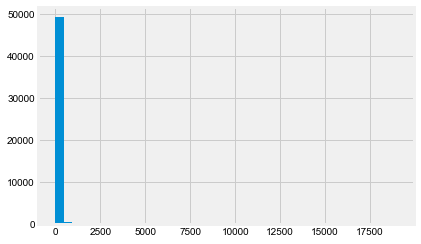

In [80]:
#histogram
df_train['price'].hist(bins = 40)

In [81]:
(df_train['price']==0).sum()

20

In [82]:
df_train = df_train[df_train.price>0]

In [83]:
df_train=df_train.dropna(subset=['price'])

In [84]:
df_train['price'].isnull().sum()

0

In [85]:
df_train.shape

(50161, 64)

I noticed that the target has a highly skewed distribution. This can cause problems for machine learning algorithms such as linear regression. A log transformation and removal of outliers makes the distribution look much closer to normal.

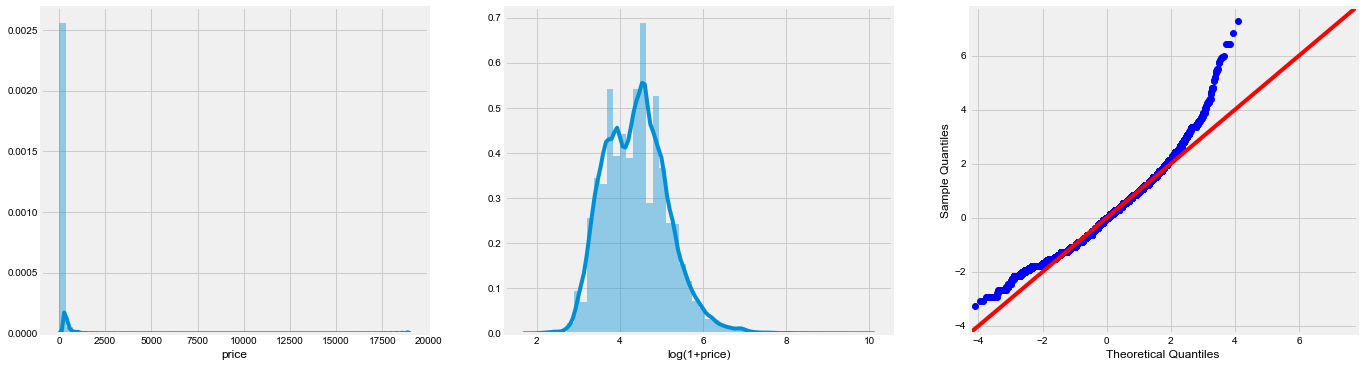

In [86]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df_train['price'], ax=axes[0])
sns.distplot(np.log1p(df_train['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(df_train['price']), stats.norm, fit=True, line='45', ax=axes[2]);

In [87]:
Combined_data = df_train[(np.log1p(df_train['price']) < 8) & (np.log1p(df_train['price']) > 2)]

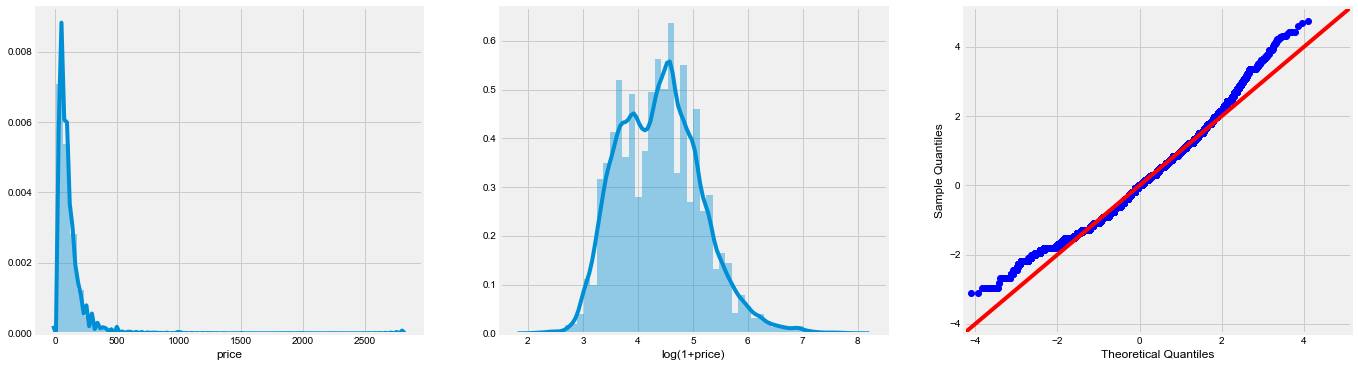

In [88]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(Combined_data['price'], ax=axes[0])
sns.distplot(np.log1p(Combined_data['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(Combined_data['price']), stats.norm, fit=True, line='45', ax=axes[2]);

Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

In [89]:
Combined_data['price'] = np.log1p(Combined_data['price'])

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [90]:
len(Combined_data[Combined_data['price'] > 8 ]) #Discovering the outliers

0

In [91]:
len(Combined_data[Combined_data['price'] < 2 ]) #Discovering the outliers

0

In [92]:
Combined_data.shape

(50134, 64)

In [93]:
#skewness & kurtosis
print("Skewness: %f" % Combined_data['price'].skew())
print("Kurtosis: %f" % Combined_data['price'].kurt())

Skewness: 0.415643
Kurtosis: 0.223791


### Availability_365

(0, 365)

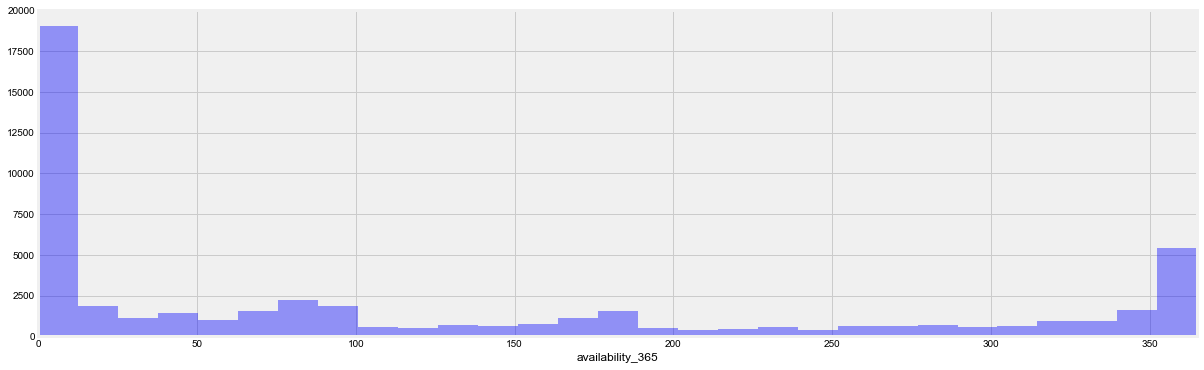

In [94]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(Combined_data['availability_365'], rug=False, kde=False, color="blue", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

This distribution is highly skewed towards the low and high end. The dataset contains a hiuge number of properties that are available only for a couple of days each year, and a decent number that are available for > 300 days.

In [95]:
Combined_data['all_year_avail'] = Combined_data['availability_365']>353
Combined_data['low_avail'] = Combined_data['availability_365']< 12

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [96]:
df_test['all_year_avail'] = df_test['availability_365']>353
df_test['low_avail'] = df_test['availability_365']< 12

In [97]:
Combined_data.shape

(50134, 66)

In [98]:
df_test.shape

(11774, 65)

In [138]:
Combined_data.to_csv('Data_train_dummies.csv')
df_test.to_csv('Data_test_dummies.csv')

<a id="p8"></a>
# 8. Process : ML Models
Now that we've explored the data, we can begin to build and test different models for regression to predict the SalePrice of each house.
In classification, we used accuracy as a evaluation metric. In regression, we will use the R^2 score as well as the RMSE to evaluate our model performance. We will also use cross validation to optimize our model hyperparameters.

In [99]:
#Importing all the librairies we'll need
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

### Defining Training/Test Sets

We have already dropped the Id column for the training set since those are not involved in predicting the Sale Price of a house. We will also drop The SalePrice column from our training dataset and make LogPrice our target instead. This will improve model performance and yield a much smaller RMSE because of the scale.

In [100]:
X_train = Combined_data.drop(["price"], axis=1)
y_train = Combined_data["price"]

### Splitting into Validation

Try to split our training data again into validation sets. This will help us evaluate our model performance and maybe avoid overfitting. The data will be split in a 80–20 ratio.


In [101]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [102]:
print('Dimensions of the training feature matrix: {}'.format(X_training.shape))
print('Dimensions of the training target vector: {}'.format(y_training.shape))
print('Dimensions of the test feature matrix: {}'.format(X_valid.shape))
print('Dimensions of the test target vector: {}'.format(y_valid.shape))

Dimensions of the training feature matrix: (40107, 65)
Dimensions of the training target vector: (40107,)
Dimensions of the test feature matrix: (10027, 65)
Dimensions of the test target vector: (10027,)


### Rescale the design matrix
I now scale the design matrix with sklearn's RobustScaler() so that each predictor has zero mean and unit variance. This helps the convergence of machine learning algorithms such as linear regression.

I avoid data snooping by defining the scaleing transformation based on the training data not the test data.

In [103]:
scaler = RobustScaler()
X_training = scaler.fit_transform(X_training)
X_valid = scaler.fit_transform(X_valid)

In [106]:
numerical_features =  Combined_data.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (50134, 65)


### Cross-validation routine
I will score models based on K-fold cross-validation with 5 folds.

In [104]:
n_folds = 5

# squared_loss
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, X_training, y_training, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
    return cross_val_score(model, Xlv_training, y_training, scoring='neg_mean_squared_error', cv=kf)

### Scoring basic models (no parameter tuning)

- **RMSE** gives an idea of how much error the system typically makes in its predictions. 
- **R2** represents the proportion of the variance for a dependent variable that's explained by an independent variable.

In [107]:
for Model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    if Model == XGBRegressor: cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = rmse_cv(Model())
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

LinearRegression: 0.15970 +/- 0.004078
Ridge: 0.15970 +/- 0.004076
Lasso: 0.52427 +/- 0.006169
ElasticNet: 0.52377 +/- 0.006114
RandomForestRegressor: 0.14153 +/- 0.003360
XGBRegressor: 0.13702 +/- 0.002948
HuberRegressor: 0.20678 +/- 0.007784


### Ridge Regression
#### Hyperparameter optimization

I find the best value of the L2 penalty hyperparameter with a telescopic search based on cross-validation scores. Then I'll train the Ridge model on the entire training set and test how it performs on the held-out test set.

In [168]:
alphas1 = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75] 
cv_ridge1 = [-rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas1]

In [169]:
alphas2 = [0.5*i for i in range(4,12)]
cv_ridge2 = [-rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas2]

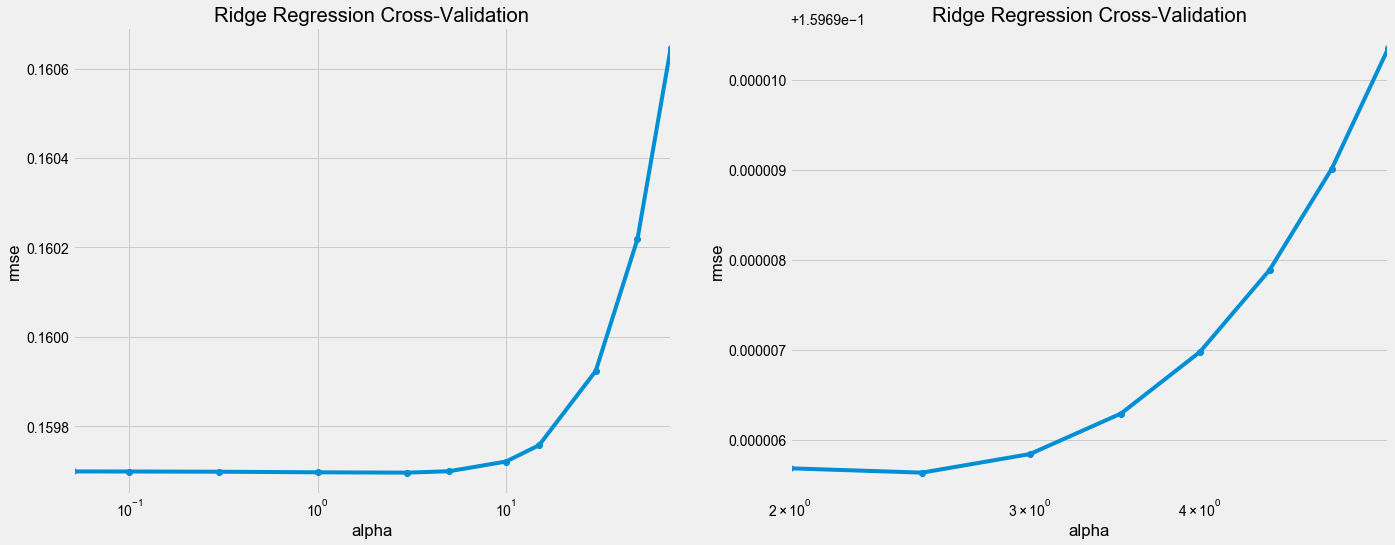

In [170]:
cv_ridge1 = pd.Series(cv_ridge1, index = alphas1) 
cv_ridge2 = pd.Series(cv_ridge2, index = alphas2) 

fig, axes = plt.subplots(1,2,figsize=(21, 8))
cv_ridge1.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[0]) 
axes[0].set_xlabel("alpha") 
axes[0].set_ylabel("rmse")
axes[0].set_xscale('log')

cv_ridge2.plot(title = "Ridge Regression Cross-Validation", style='-o', ax = axes[1]) 
axes[1].set_xlabel("alpha") 
axes[1].set_ylabel("rmse")
axes[1].set_xscale('log')

In [171]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = alphas1,
        y= cv_ridge1,
        line = dict(color='royalBlue', width=2)
        ),
)



fig.update_layout(
   
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Penalty",
            font=dict(
                size=16
            )
        )
    ),
    
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Cross-validation error",
            font=dict(
                size=16
            )
        )
    ),
)


fig.update_layout(height=400,
                width = 600,
                title = 'Telescopic Search: Coarse level', 
                  xaxis_type="log", 
                  showlegend=False)

fig.show()

In [172]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = alphas2,
        y= cv_ridge2,
        line = dict(color='crimson', width=2)
        ),
)



fig.update_layout(
   
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Penalty",
            font=dict(
                size=16
            )
        )
    ),
    
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Cross-validation error",
            font=dict(
                size=16
            ),
        )
    ),
)


fig.update_layout(height=400,
                width = 600,
                title = 'Telescopic Search: Fine level', 
                  xaxis_type="log", 
                  showlegend=False)

fig.show()

#### Best Ridge Regression model

In [261]:
best_alpha

0.0001

In [174]:
best_alpha = alphas2[np.argmin(cv_ridge2.values)]
RR_CV_best = -rmse_cv(Ridge(alpha = best_alpha))
RR = Ridge(alpha = best_alpha) 
RR.fit(X_training, y_training) 
y_train_RR = RR.predict(X_training)
y_test_RR = RR.predict(X_valid)
ridge_results = pd.DataFrame({'algorithm':['Ridge Regression'],
            'CV error': RR_CV_best.mean(), 
            'CV std': RR_CV_best.std(),
            'training error': [mean_squared_error(y_training, y_train_RR)],
            'test error': [mean_squared_error(y_test_RR, y_test_RR)],
            'training_r2_score': [r2_score(y_training, y_train_RR)],
            'test_r2_score': [r2_score(y_valid, y_test_RR)]})
ridge_results

algorithm  CV error    CV std  training error  test error  \
0  Ridge Regression  0.159696  0.004072        0.159118         0.0   

   training_r2_score  test_r2_score  
0            0.71191       0.705303

#### Interpretation of instance predictions with Lime

In [176]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_training, feature_names=Combined_data.columns, class_names=['price'], verbose=True, mode='regression')

In [186]:
i=95
exp = explainer.explain_instance(X_valid[i], RR.predict, num_features=5)
item = pd.DataFrame(scaler.inverse_transform(X_valid[i].reshape(1,-1))[0], index=X_train.columns)
item.loc['true_price'] = np.exp(y_valid.iloc[i])
#print(exp.intercept)
#print(exp.local_pred)
item.loc['predicted_price'] = np.exp(exp.local_pred)
item[(item.select_dtypes(include=['number']) != 0).any(1)]

Intercept 4.600620417158726
Prediction_local [4.92249523]
Right: 4.63141063183445


0
latitude                                          51.586683
longitude                                         -0.104253
accommodates                                       5.000000
bathrooms                                          1.000000
bedrooms                                           2.000000
amenities                                         22.000000
guests_included                                    5.000000
number_of_reviews                                  2.928571
calculated_host_listings_count                     3.000000
availability_365                                  -4.770563
review_scores_rating                             100.800000
beds                                               3.000000
host_total_listings_count                          7.666667
host_identity_verified                             1.000000
is_location_exact                                  1.000000
host_is_superhost                                  1.000000
distance                                          18.236418
room_type_Entire home/apt                          1.000000
neighbourhood_cleansed_Haringey                    1.000000
cancellation_policy_strict_14_with_grace_period    1.000000
Wifi                                               1.000000
Tv                                                 1.000000
low_avail                                          1.000000
true_price                                        81.000000
predicted_price                                  137.344893

In [187]:
exp.show_in_notebook(show_table=True)

In [188]:
i=515
exp = explainer.explain_instance(X_valid[i], RR.predict, num_features=5)
item = pd.DataFrame(scaler.inverse_transform(X_valid[i].reshape(1,-1))[0], index=X_train.columns)
item.loc['true_price'] = np.exp(y_valid.iloc[i])
#print(exp.intercept)
#print(exp.local_pred)
item.loc['predicted_price'] = np.exp(exp.local_pred)
item[(item.select_dtypes(include=['number']) != 0).any(1)]

Intercept 4.767980447404688
Prediction_local [4.36007102]
Right: 3.861229863970898


0
latitude                         51.538858
longitude                        -0.196944
accommodates                      2.000000
bathrooms                         1.000000
bedrooms                          1.000000
amenities                        13.000000
guests_included                   1.000000
number_of_reviews                -0.285714
calculated_host_listings_count    1.000000
availability_365                279.367965
review_scores_rating             96.000000
beds                              1.000000
host_total_listings_count         1.000000
is_location_exact                 1.000000
distance                         22.688398
room_type_Private room            1.000000
neighbourhood_cleansed_Brent      1.000000
cancellation_policy_flexible      1.000000
Wifi                              1.000000
Tv                                1.000000
true_price                       51.000000
predicted_price                  78.262692

In [189]:
exp.show_in_notebook(show_table=True)

#### Summary of local interpretation on test set

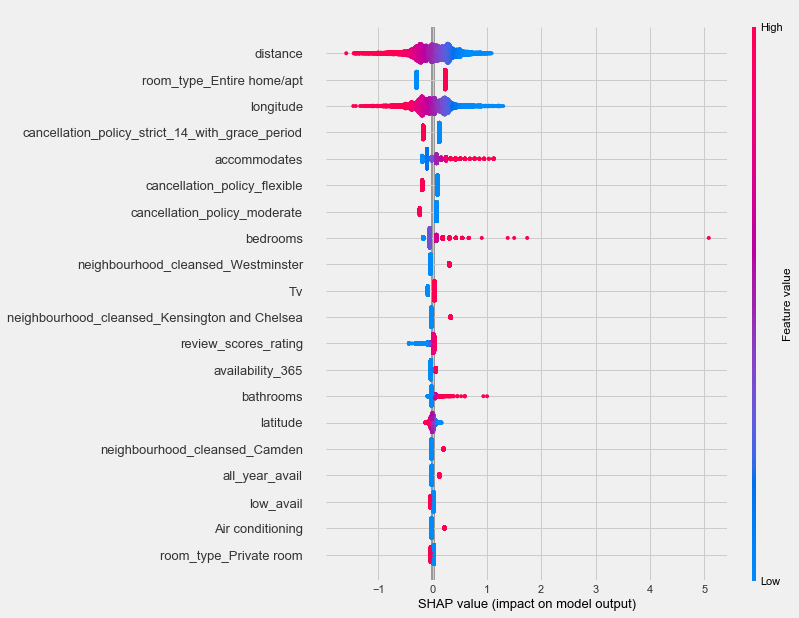

In [190]:
explainer_sh = shap.LinearExplainer(RR, X_training, feature_dependence='independent')
shap_values = explainer_sh.shap_values(X_valid)
shap.summary_plot(shap_values, X_valid, feature_names=X_train.columns)

### LASSO Regression
#### Hyperparameter optimization

The training error for LASSO is somewhat higher than for Ridge . However, the  LASSO is still useful - for one as, a variable selector!

In [192]:
alphas = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1] 
cv_lasso = [-rmse_cv(Lasso(alpha = alpha, max_iter=2000)).mean() for alpha in alphas]

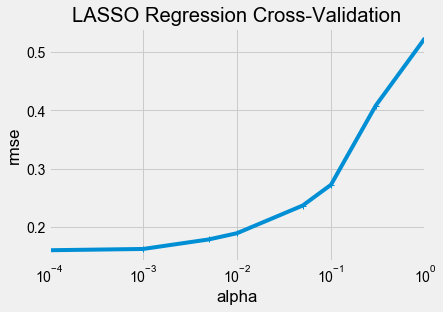

In [193]:
cv_lasso = pd.Series(cv_lasso, index = alphas) 
cv_lasso.plot(title = "LASSO Regression Cross-Validation", style='-+') 
plt.xlabel("alpha") 
plt.ylabel("rmse") 
plt.xscale('log')

In [194]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = alphas,
        y= cv_lasso,
        line = dict(color='crimson', width=2)
        ),
)



fig.update_layout(
   
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Penalty",
            font=dict(
                size=16
            )
        )
    ),
    
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Cross-validation error",
            font=dict(
                size=16
            ),
        )
    ),
)


fig.update_layout(height=400,
                width = 600,
                title = 'Lasso penalty optimization', 
                  xaxis_type="log", 
                  showlegend=False)

fig.show()

In [197]:
best_alpha = alphas[np.argmin(cv_lasso.values)]
lasso_CV_best = -rmse_cv(Lasso(alpha = best_alpha))
lasso = Lasso(alpha = best_alpha) 
lasso.fit(X_training, y_training) 
y_train_lasso = lasso.predict(X_training)
y_test_lasso = lasso.predict(X_valid)
lasso_results = pd.DataFrame({'algorithm':['LASSO Regression'],
            'CV error': lasso_CV_best.mean(), 
            'CV std': lasso_CV_best.std(),
            'training error': [mean_squared_error(y_train_lasso, y_training)],
            'test error': [mean_squared_error(y_test_lasso, y_valid)],
            'training_r2_score': [r2_score(y_training, y_train_lasso)],
            'test_r2_score': [r2_score(y_valid, y_test_lasso)]})
lasso_results

algorithm  CV error    CV std  training error  test error  \
0  LASSO Regression  0.159734  0.004053         0.15917    0.166552   

   training_r2_score  test_r2_score  
0           0.711816        0.70521

### Variables selected

In [199]:
features = list(X_train.columns)
coef = pd.Series(lasso.coef_, index = features)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 60 variables and eliminated the other 5 variables


In [200]:
coef

latitude                                          -3.579435e-02
longitude                                         -4.188776e-01
accommodates                                       1.748288e-01
bathrooms                                          3.418201e-02
bedrooms                                           1.190377e-01
amenities                                         -1.480843e-03
guests_included                                    7.861196e-03
number_of_reviews                                 -1.424111e-02
calculated_host_listings_count                     3.499024e-04
availability_365                                   5.820865e-02
review_scores_rating                               2.926254e-02
beds                                              -1.594726e-02
host_total_listings_count                          7.076479e-04
host_identity_verified                            -9.002905e-03
is_location_exact                                 -2.322978e-03
host_is_superhost                       

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

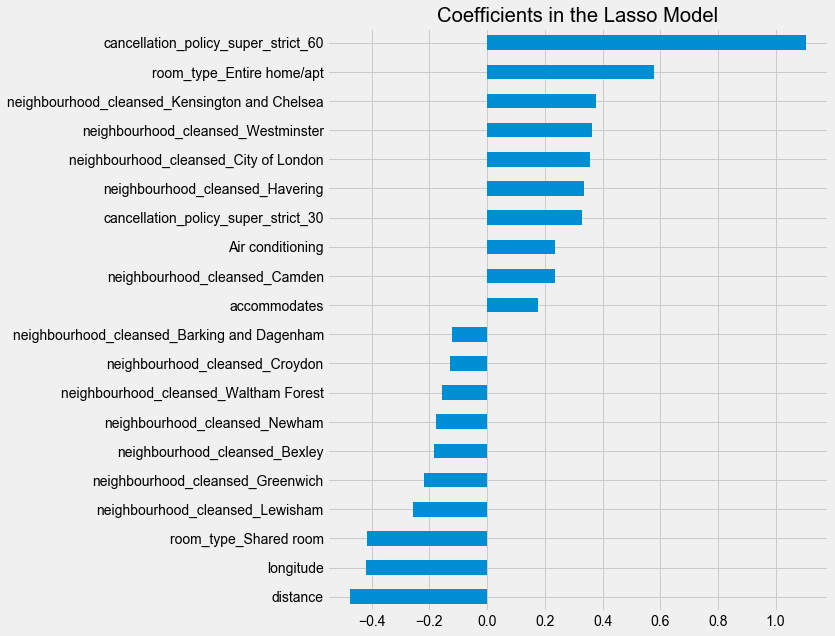

In [201]:
imp_coef = pd.concat([coef.sort_values().iloc[:10],
                     coef.sort_values().iloc[-10:]])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [203]:
i=25
exp = explainer.explain_instance(X_valid[i], lasso.predict, num_features=5)

Intercept 5.5115523742155235
Prediction_local [4.5217741]
Right: 3.6793808927538723


In [204]:
exp.show_in_notebook(show_table=True)

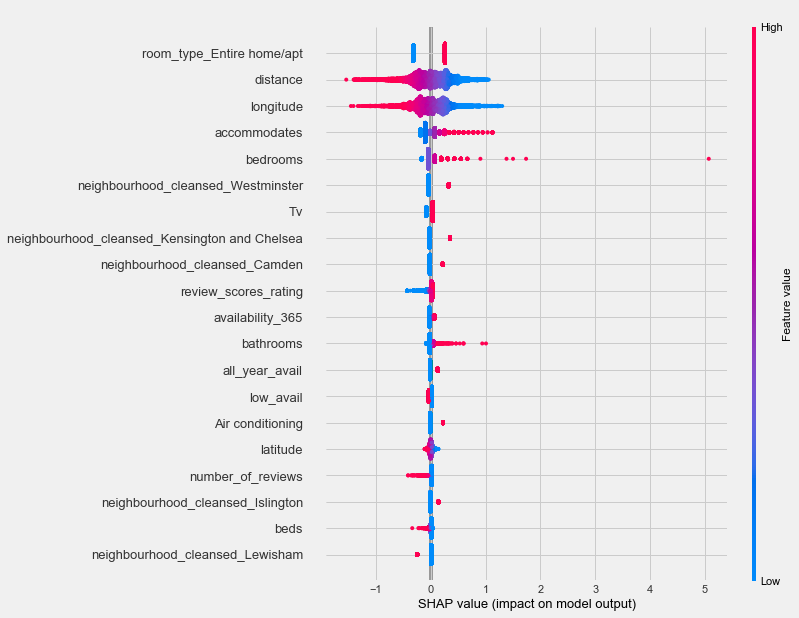

In [208]:
explainer = shap.LinearExplainer(lasso, X_training, feature_dependence='independent')
shap_values = explainer.shap_values(X_valid)
shap.summary_plot(shap_values, X_valid, feature_names=X_train.columns)

### Huber regression

In [209]:
alphas = [0.0001, 0.001, 0.005,0.01, 0.05, 0.1, 0.3, 1] 
cv_huber = [-rmse_cv(HuberRegressor(alpha = alpha, max_iter=2000)).mean() for alpha in alphas]
#cv_huber = [0.20051906841425277, 0.20044833042114646, 0.20048899799050565, 0.200533996471012, 0.20051788009059482, 0.2005294886778608, 0.20052011204607623, 0.2004070661477452]

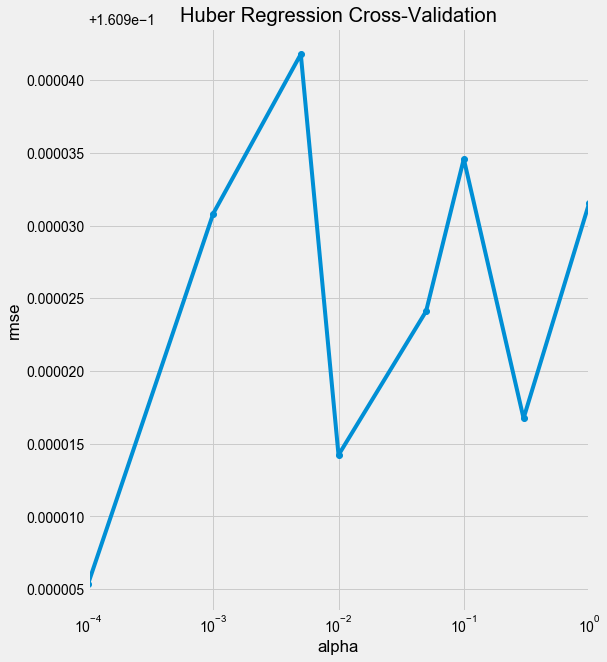

In [210]:
cv_huber = pd.Series(cv_huber, index = alphas) 
cv_huber.plot(title = "Huber Regression Cross-Validation", style='-o') 
plt.xlabel("alpha") 
plt.ylabel("rmse") 
plt.xscale('log')

In [211]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = alphas,
        y= cv_huber,
        line = dict(color='crimson', width=2)
        ),
)



fig.update_layout(
   
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Penalty",
            font=dict(
                size=16
            )
        )
    ),
    
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Cross-validation error",
            font=dict(
                size=16
            ),
        )
    ),
)


fig.update_layout(height=400,
                width = 600,
                title = 'Lasso penalty optimization', 
                  xaxis_type="log", 
                  showlegend=False)

fig.show()

In [212]:
best_alpha = alphas[np.argmin(cv_huber.values)]
huber_CV_best = -rmse_cv(HuberRegressor(alpha=best_alpha))
huber = HuberRegressor(alpha=best_alpha)
huber.fit(X_training, y_training) 
y_train_huber = huber.predict(X_training)
y_test_huber = huber.predict(X_valid)
huber_results = pd.DataFrame({'algorithm':['Huber Regression'],
            'CV error': huber_CV_best.mean(), 
            'CV std': huber_CV_best.std(),
            'training error': [mean_squared_error(y_training, y_train_huber)],
            'test error': [mean_squared_error(y_valid, y_test_huber)],
            'training_r2_score': [r2_score(y_training, y_train_huber)],
            'test_r2_score': [r2_score(y_valid, y_test_huber)]})
huber_results

algorithm  CV error    CV std  training error  test error  \
0  Huber Regression  0.206775  0.007784        0.236191    0.247578   

   training_r2_score  test_r2_score  
0           0.572366       0.561797

### Random Forest Regressor

In [213]:
rfr_CV_baseline = -rmse_cv(RandomForestRegressor(random_state=42))
rfr_baseline = RandomForestRegressor(random_state=42)
rfr_baseline.fit(X_training, y_training) 
y_train_rfr = rfr_baseline.predict(X_training)
y_test_rfr = rfr_baseline.predict(X_valid)
rfr_baseline_results = pd.DataFrame({'algorithm':['Random Forest Regressor [baseline]'],
            'CV error': rfr_CV_baseline.mean(), 
            'CV std': rfr_CV_baseline.std(),
            'training error': [mean_squared_error(y_train_rfr, y_training)],
            'test error': [mean_squared_error(y_test_rfr, y_valid)]})

In [214]:
rfr_baseline_results

algorithm  CV error    CV std  training error  \
0  Random Forest Regressor [baseline]  0.140962  0.003102        0.024712   

   test error  
0    0.142254

We see that the training error is nearly an order of magnitude smaller than the test error, and the training error for any of the other algorithms. The baseline model is overfitting massively! Let's look at the baseline model's parameter values.

In [215]:
eli5.show_weights(rfr_baseline, feature_names=list(X_train.columns))

#### Hyperparameter tuning

In [216]:
rf = RandomForestRegressor(random_state=42)
from pprint import pprint
print('Parameters currently in use: \n')
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [217]:
#Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [218]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_training, y_training)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 27.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [220]:
best_random = rf_random.best_estimator_
pprint(best_random.get_params())

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 60,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [221]:
best_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
rfr_CV_best = -rmse_cv(best_random)
best_random.fit(X_training, y_training) 
y_train_rfr = best_random.predict(X_training)
y_test_rfr = best_random.predict(X_valid)
rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],
            'CV error': rfr_CV_best.mean(), 
            'CV std': rfr_CV_best.std(),
            'training error': [mean_squared_error(y_training, y_train_rfr)],
            'test error': [mean_squared_error(y_valid, y_test_rfr)],
            'training_r2_score': [r2_score(y_training, y_train_rfr)],
            'test_r2_score': [r2_score(y_valid, y_test_rfr)]})
rfr_best_results

algorithm  CV error    CV std  training error  test error  \
0  Random Forest Regressor  0.127806  0.002906        0.058439     0.12925   

   training_r2_score  test_r2_score  
0           0.894193       0.771233

In [222]:
eli5.show_weights(best_random, feature_names=list(X_train.columns))

### XGBoost Regressor
#### Baseline model (default parameters)

In [223]:
xgb_baseline = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping=5)
kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(numerical_features)
cv_res = cross_val_score(xgb_baseline, X_training, y_training, scoring='neg_mean_squared_error', cv=kf)
xgb_baseline.fit(X_training, y_training)
y_train_xgb_base = xgb_baseline.predict(X_training)
y_test_xgb_base = xgb_baseline.predict(X_valid)
xgb_baseline_results = pd.DataFrame({'algorithm':['XGBRegressor[baseline]'],
            'CV error': cv_res.mean(), 
            'CV std': cv_res.std(),
            'training error': [mean_squared_error(y_train_xgb_base, y_training)]})

[16:54:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [224]:
print(xgb_baseline)
xgb_baseline_results

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, early_stopping=5, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


algorithm  CV error    CV std  training error
0  XGBRegressor[baseline] -0.124105  0.002982        0.113503

#### Learning rate optimization

In [227]:
d = {'Learning Rate':[],
            'Mean CV Error': [],
            'CV Error Std': [],
            'Training Error': []}
for lr in [0.01, 0.05, 0.1, 0.5]:
    #continue
    xgb_model = XGBRegressor(n_estimators=1000, learning_rate=lr, early_stopping=5)
    cv_res = -cross_val_score(xgb_model, X_training, y_training, scoring='neg_mean_squared_error', cv=kf)
    xgb_model.fit(X_training, y_training)
    y_train_xgb = xgb_model.predict(X_training)
    d['Learning Rate'].append(lr)
    d['Mean CV Error'].append(cv_res.mean())
    d['CV Error Std'].append(cv_res.std())
    # makes no sense to look at max/min when we only have 3 CV folds
    #d['Max CV Error'].append(max(cv_res)
    #d['Min CV Error'].append(max(cv_res)
    d['Training Error'].append(mean_squared_error(y_train_xgb, y_training))

xgb_tuning_1 = pd.DataFrame(d)
xgb_tuning_1

[17:02:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:09:15] WARNI

Learning Rate  Mean CV Error  CV Error Std  Training Error
0           0.01       0.137522      0.002950        0.133640
1           0.05       0.124105      0.002982        0.113503
2           0.10       0.121177      0.002818        0.104057
3           0.50       0.130378      0.003718        0.071099

Text(0, 0.5, 'Mean Squared Error')

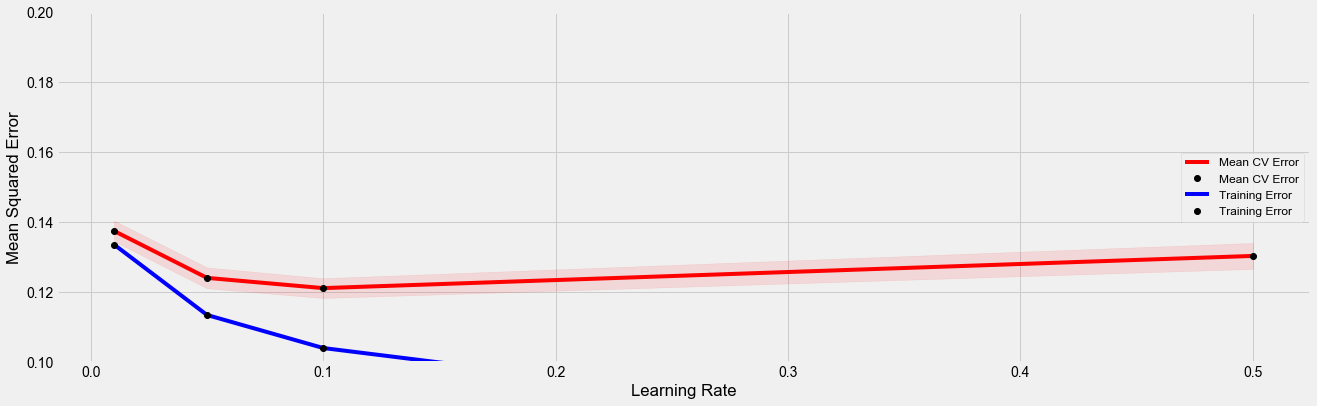

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(20,6))

ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'], color='red')
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'], 'o', color='black')
ax.fill_between(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Mean CV Error'] - xgb_tuning_1['CV Error Std'], xgb_tuning_1['Mean CV Error'] + xgb_tuning_1['CV Error Std'], color='r', alpha=.1)
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Training Error'], color='blue')
ax.plot(xgb_tuning_1['Learning Rate'], xgb_tuning_1['Training Error'], 'o', color='black')
ax.legend(fontsize=12, loc = 'center right');
ax.set_ylim(0.1, 0.2)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Mean Squared Error')
#ax.set_title('')

#### max_depth and min_child_weight optimization

In [229]:
d = {'max_depth':[],
             'min_child_weight': [],
            'Mean CV Error': [],
            'CV Error Std': [],
            'Training Error': []}
xgbreg = XGBRegressor(n_estimators=2, learning_rate=0.05, early_stopping=5)
params2 = {'max_depth': list(range(3,10,2)), 'min_child_weight': list(range(1,6,2))}
#print(params2)
#xgb_random.fit(X_train, y_train)
kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(X_training)
for md in params2['max_depth']:
    for mcw in params2['min_child_weight']:
        #continue
        xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=md, min_child_weight=mcw )
        cv_res = -cross_val_score(xgb_model, X_training, y_training, scoring='neg_mean_squared_error', cv=kf)
        xgb_model.fit(X_training, y_training)
        y_train_xgb = xgb_model.predict(X_training)
        d['max_depth'].append(md)
        d['min_child_weight'].append(mcw)
        d['Mean CV Error'].append(cv_res.mean())
        d['CV Error Std'].append(cv_res.std())
        # makes no sense to look at max/min when we only have 3 CV folds
        #d['Max CV Error'].append(max(cv_res)
        #d['Min CV Error'].append(max(cv_res)
        d['Training Error'].append(mean_squared_error(y_train_xgb, y_training))

xgb_tuning_2 = pd.DataFrame(d)
xgb_tuning_2

[17:30:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:34:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:05] WARNI

max_depth  min_child_weight  Mean CV Error  CV Error Std  Training Error
0           3                 1       0.121177      0.002818        0.104057
1           3                 3       0.121229      0.002887        0.103527
2           3                 5       0.121354      0.003188        0.103911
3           5                 1       0.119510      0.002682        0.070969
4           5                 3       0.120371      0.003022        0.070926
5           5                 5       0.120376      0.002758        0.072246
6           7                 1       0.121991      0.003234        0.036026
7           7                 3       0.121741      0.003182        0.036883
8           7                 5       0.121273      0.003136        0.038830
9           9                 1       0.122910      0.003641        0.011887
10          9                 3       0.123024      0.003175        0.013549
11          9                 5       0.122931      0.003328        0.015743

In [236]:
xgb_tuning_3['Mean CV Error']

9     0.122910
10    0.123024
11    0.122931
Name: Mean CV Error, dtype: float64

(0.172, 0.181)

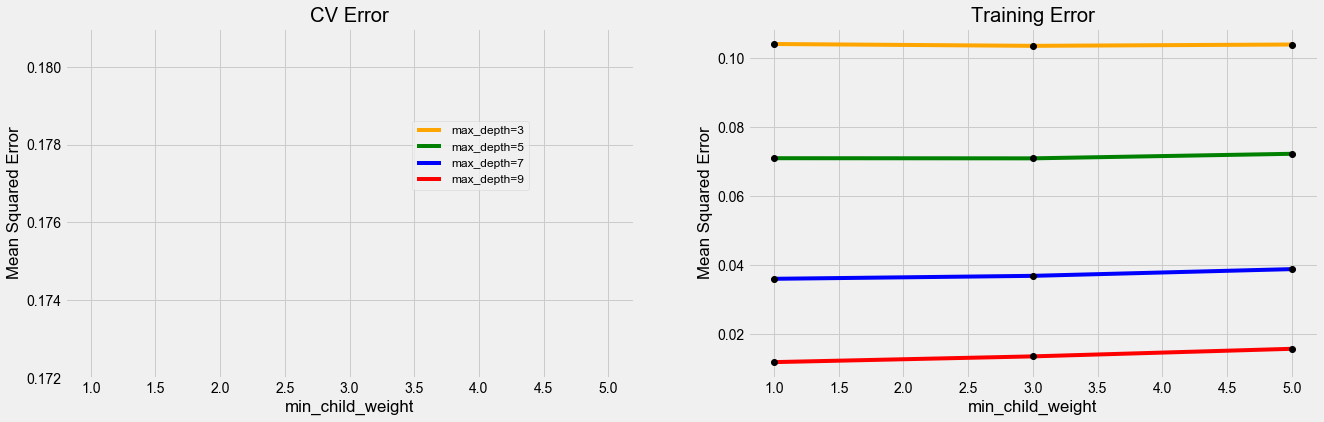

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))

colors = ['orange','green','blue','red']

for i, md in enumerate(params2['max_depth']):
    color = colors[i]
    xgb_tuning_3 = xgb_tuning_2[xgb_tuning_2['max_depth']==md]
    axes[0].plot(xgb_tuning_3['min_child_weight'], xgb_tuning_3['Mean CV Error'], color=color, label= 'max_depth='+str(md))
    axes[0].plot(xgb_tuning_3['min_child_weight'], xgb_tuning_3['Mean CV Error'], 'o', color='black', label='_nolegend_')
    #ax.fill_between(xgb_tuning_3['Max_depth'], xgb_tuning_3['Mean CV Error'] - xgb_tuning_3['CV Error Std'], 
                    #xgb_tuning_3['Mean CV Error'] + xgb_tuning_3['CV Error Std'], color='r', alpha=.1, label='_nolegend_')
    axes[1].plot(xgb_tuning_3['min_child_weight'], xgb_tuning_3['Training Error'], color=color, label='max_depth='+str(md))
    axes[1].plot(xgb_tuning_3['min_child_weight'], xgb_tuning_3['Training Error'], 'o', color='black', label='_nolegend_')

for ax in axes:
    ax.set_xlabel('min_child_weight')
    ax.set_ylabel('Mean Squared Error')
    
axes[0].set_title('CV Error')
axes[1].set_title('Training Error')

axes[0].legend(fontsize=12, bbox_to_anchor=(0.6, .52, .7, .602), loc=3,);
axes[0].set_ylim([0.172, 0.181])

In [234]:
print('Optimal parameter values are: ')
best = xgb_tuning_2.iloc[xgb_tuning_2.idxmin()['Mean CV Error']]
print('max_depth: {}'.format(int(best['max_depth'])))
print('min_child_weight: {}'.format(int(best['min_child_weight'])))

Optimal parameter values are: 
max_depth: 5
min_child_weight: 1


#### Best model

In [237]:
xbgreg_best = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=5, min_child_weight=1 )
xbgreg_CV_best = -rmse_cv(xbgreg_best)
xbgreg_best.fit(X_training, y_training) 
y_train_xgbreg = xbgreg_best.predict(X_training)
y_test_xgbreg = xbgreg_best.predict(X_valid)
xgb_best_results = pd.DataFrame({'algorithm':['XGBRegressor'],
            'CV error': xbgreg_CV_best.mean(), 
            'CV std': xbgreg_CV_best.std(),
            'training error': [mean_squared_error(y_training, y_train_xgbreg)],
            'test error': [mean_squared_error(y_valid, y_test_xgbreg)],
            'training_r2_score': [r2_score(y_training, y_train_xgbreg)],
            'test_r2_score': [r2_score(y_valid, y_test_xgbreg)]})
xgb_best_results

[21:53:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:55:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:56:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:58:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:01:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


algorithm  CV error    CV std  training error  test error  \
0  XGBRegressor   0.11951  0.002682        0.070969    0.124814   

   training_r2_score  test_r2_score  
0           0.871508       0.779085

In [244]:
eli5.show_weights(xbgreg_best, feature_names=list(X_train.columns))

### Summary

In [238]:
pd.concat([ridge_results, lasso_results, huber_results, rfr_best_results, xgb_best_results], axis=0, ignore_index=True)

algorithm  CV error    CV std  training error  test error  \
0         Ridge Regression  0.159696  0.004072        0.159118    0.000000   
1         LASSO Regression  0.159734  0.004053        0.159170    0.166552   
2         Huber Regression  0.206775  0.007784        0.236191    0.247578   
3  Random Forest Regressor  0.127806  0.002906        0.058439    0.129250   
4             XGBRegressor  0.119510  0.002682        0.070969    0.124814   

   training_r2_score  test_r2_score  
0           0.711910       0.705303  
1           0.711816       0.705210  
2           0.572366       0.561797  
3           0.894193       0.771233  
4           0.871508       0.779085

<a id="p9"></a>
# 9. Model Comparison
After applying different models and evaluating them, now we will use test data to predict the LogPrice with the most adequat one.

## Random Forest Regression 

In [326]:
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
rfr.fit(X_training, y_training)

In [300]:
rf_pred = rfr.predict(X_valid)
rf_pred = np.exp(rf_pred)
r2_rf = r2_score(np.exp(y_valid), rf_pred)
rmse_rf = np.sqrt(mean_squared_error(np.exp(y_valid), rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.61249759397639
RMSE Score: 81.3407619856533


## Xgboost

In [317]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(n_estimators=1000, learning_rate=0.1,
                       early_stopping=5, max_depth=5, min_child_weight=1)

xgb = xgboost.fit(X_training, y_training)

[01:26:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [318]:
xgb_pred = xgb.predict(X_valid)
xgb_pred = np.exp(xgb_pred)
r2_xgb = r2_score(np.exp(y_valid), xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(np.exp(y_valid), xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.6801532310048757
RMSE Score: 73.89958827213499


In [253]:
model_performances = pd.DataFrame({
    "Model" : ["Random Forest Regressor","XGBoost"],
    "R Squared" : [str(r2_rf)[0:5] ,  str(r2_xgb)[0:5]],
    "RMSE" : [str(rmse_rf)[0:8], str(rmse_xgb)[0:8]]
})
model_performances.round(4)

print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


Model R Squared      RMSE
1                  XGBoost     0.689  72.80136
0  Random Forest Regressor     0.612  81.34076

In [254]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


Model R Squared      RMSE
1                  XGBoost     0.689  72.80136
0  Random Forest Regressor     0.612  81.34076

Finally, I decided to use the XGBoost on the test set because I believe it will perform the best based on the comparison above. It has a high R^2 value and a low RMSE.
But before doing that, let's try to improve our Gradient Boosting Regression model by tuning its parameters.

<a id="p10"></a>
# 10. Conclusion

This Airbnb ('AB_LONDON_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration and visualization on each significant column presented. But unfortunately for modelling with regression when we compare real and predicted values we couldnt reach the wanted aim because of data in hands.

At the end, we can even choose Random Forest or XGBoost model to best fit our prediction.

Overall, with this study we discovered a very good number of interesting relationships between features and tried to explain each step of the process. This data analytics adn visualizations will useful for better business decisions, control over the platform, marketing initiatives and much more... Therefore, I hope this kernel helps everyone!

## References :

- Penalized regression: https://www.kaggle.com/aaron7sun/you-got-this-feature-engineering-and-lasso
- Hyperparameter tuning for random forests: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74